<a id='top'> </a>
<h1> <center><font color='Navy'>Predicting Speed Dating Matches </font> </center> </h1>

<h3> <center> Author: Anil Kumar <br> June 10, 2021 </center> </h3>


<ol>
    <li> <a href='#problem'> <b><h4>Project Motivation</h4></b> </a></li>
    <li> <a href='#dataset'> <b><h4>Dataset</h4></b></a></li>
    <li> <a href='#analysis'> <b><h4>Analysis Plan</h4></b> </a></li>
    <li> <a href='#eda'> <b><h4>Preprocessing and Exploratory Data Analysis</h4></b></a></li>
    <li> <a href='#modeling'> <b><h4>Modeling and Results</h4></b></a></li>
    <li> <a href='#conclusions'> <b><h4>Conclusions and Further Directions</h4></b></a></li>
    <li> <a href='#references'> <b><h4>References</h4></b></a></li>
</ol>


## <a id='problem'>1. Project Motivation </a>


**Speed Dating** is an organized event where participants meet multiple potential suitors in a relatively short period of time. Participants meet with each other on short "dates" that usually last 3-8 minutes. At the end of each round, participants rotate to another date, and at the end of the session participants submit a list of people that they are interested in seeing again. If a pair of participants both agree to meet up outside the scope of the dating service, they are considered a **match** and their contact information is given to each other after a few days.<sup><b><a href="https://en.wikipedia.org/wiki/Speed_dating">1</a></b></sup><br>



For speed dating services, it could be beneficial to be able to predict matches based on participant survey responses about themselves, their preferences, and opinions about a potential suitor. Dating services could use the data to gain insights into what factors really motivate whether two people will match. With this information, services could be further personalized to clients in order to give them the best experience and more importantly the best opportunities to find matches. 

## <a id='dataset'> 2. Dataset </a>

The dataset was obtained from <a href='https://github.com/datacamp/careerhub-data/tree/master/Speed%20Dating'>here</a>, DataCamp's <b>careerhub-data</b> repository on GitHub.  The original files and data dictionary can be viewed at the link as well.  A specific speed dating service from which the data came was not disclosed.  The data consists of multiple participant survey responses from speed dating encounters, and also whether the encounters ended up in a **match** (target attribute).  Each observation consists of participant and partner responses to questions regarding interests, preferences, and opinions about the other person from a speed dating encounter.  Demographic features such as race, gender, and age are also included.  For this dataset, it appears that each participant meets with 20 potential partners, as deduced from the data dictionary.    

In summary, the data has 61 features and a binary target (**NOTE:** Not all the original features listed in the data dictionary are eventually used for modeling and this topic is discussed further in the <a href='#eda'><i>Preprocessing and Exploratory Data Analysis</i></a> section).  A summary of the attributes is below.  For the numeric features, some have different scales, and these are indicated below.  Higher ratings represent more positive or stronger opinions.    An incidental finding is that there are spelling errors in three columns (**sinsere_o** should be sin<b>c</b>ere_o; **ambitous_o** should be ambit<b>i</b>ous_o; **intellicence_important** should be intelli<b>g</b>ence_important).  However, these spelling errors are irrelevant with respect to creation of models or their interpretation, and are merely observational.
<br>

In the summary below, "person" refers to a participant, and "partner" refers to their potential suitor from a speed dating encounter.

<br>

**TARGET (0=Non-Match, 1=Match):**
<ul> 
<li><b>match</b>: Whether the person and partner matched</li> 
</ul>

<br>

**BINARY FEATURES (0=No, 1=Yes):**
<ul>
<li><b>samerace</b>: Whether the person and partner are the same race</li> 
<li><b>met</b>: Whether the person and partner have met before</li> 
<li><b>has_null</b>: Whether the person/observation/row has missing data for at least one feature</li> 
</ul>

<br>

**CATEGORICAL FEATURES:** 
<ul>
<li><b>gender</b>: Gender of person</li> 
<li><b>race</b>: Race of person</li> 
<li><b>race_o</b>: Race of partner</li> 
</ul>

<br>

**NUMERIC FEATURES ON 0-10 SCALE:**
<ul>
<li><b>importance_same_race</b>: How important is it that partner is the same race</li> 
<li><b>importance_same_religion</b>: How important is it that partner has same religion</li> 
<li><b>attractive</b>: Person's self-rating - attractiveness</li> 
<li><b>attractive_partner</b>: Person's rating of partner - attractiveness</li> 
<li><b>attractive_o</b>: Rating by partner (about person) at night of event on attractiveness</li> 
<li><b>sincere</b>: Person's self-rating - sincerity</li> 
<li><b>sincere_partner</b>: Person's rating of partner - sincerity</li> 
<li><b>sinsere_o</b>: Rating by partner (about person) at night of event on sincerity</li> 
<li><b>intelligence</b>: Person's self-rating - intelligence</li> 
<li><b>intelligence_partner</b>: Person's rating of partner - intelligence</li> 
<li><b>intelligence_o</b>: Rating by partner (about person) at night of event on intelligence</li> 
<li><b>funny</b>: Person's self-rating - being funny</li> 
<li><b>funny_partner</b>: Person's rating of partner - being funny</li> 
<li><b>funny_o</b>: Rating by partner (about person) at night of event on being funny</li> 
<li><b>ambition</b>: Person's self-rating - ambition</li> 
<li><b>ambition_partner</b>: Person's rating of partner - ambition</li> 
<li><b>ambitous_o</b>: Rating by partner (about person) at night of event on being ambitious</li> 
<li><b>shared_interests_partner</b>: Person's rating of partner - shared interests</li> 
<li><b>shared_interests_o</b>: Rating by partner (about person) at night of event on shared interests</li> 
<li><b>sports</b>: Person's interest in sports</li> 
<li><b>tvsports</b>: Person's interest in tv sports   </li> 
<li><b>exercise</b>: Person's interest in exercise  </li> 
<li><b>dining</b>: Person's interest in dining  </li> 
<li><b>museums</b>: Person's interest in museums  </li> 
<li><b>art</b>: Person's interest in art  </li> 
<li><b>hiking</b>: Person's interest in hiking  </li> 
<li><b>gaming</b>: Person's interest in gaming  </li> 
<li><b>clubbing</b>: Person's interest in clubbing  </li> 
<li><b>reading</b>: Person's interest in reading  </li> 
<li><b>tv</b>: Person's interest in tv  </li> 
<li><b>theater</b>: Person's interest in theater  </li> 
<li><b>movies</b>: Person's interest in movies  </li> 
<li><b>concerts</b>: Person's interest in concerts  </li> 
<li><b>music</b>: Person's interest in music  </li> 
<li><b>shopping</b>: Person's interest in shopping  </li> 
<li><b>yoga</b>: Person's interest in yoga  </li> 
<li><b>expected_happy_with_sd_people</b>: How happy does person expect to be with the people they meet during the speed-dating event </li> 
<li><b>like</b>: How much does the person like their partner  </li> 
<li><b>guess_prob_liked</b>: How likely does the person think it is that their partner likes them  </li> 
</ul>

<br>

**NUMERIC FEATURES ON 0-100 SCALE:**
<ul>
<li><b>intellicence_important</b>: What person looks for in a partner - intelligence </li> 
<li><b>attractive_important</b>: What person looks for in a partner - attractiveness </li> 
<li><b>sincere_important</b>: What person looks for in a partner - sincerity </li> 
<li><b>funny_important</b>: What person looks for in a partner - being funny </li> 
<li><b>ambtition_important</b>: What person looks for in a partner - ambition </li> 
<li><b>shared_interests_important</b>: What person looks for in a partner - shared interests </li> 
<li><b>pref_o_attractive</b>: How important does partner rate attractiveness </li> 
<li><b>pref_o_sincere</b>: How important does partner rate sincerity </li> 
<li><b>pref_o_intelligence</b>: How important does partner rate intelligence </li> 
<li><b>pref_o_funny</b>: How important does partner rate being funny </li> 
<li><b>pref_o_ambitious</b>: How important does partner rate ambition </li> 
<li><b>pref_o_shared_interests</b>: How important does partner rate having shared interests</li> 
</ul>

<br>

**OTHER NUMERIC FEATURES:**
<ul>
<li><b>age</b>: Age of person</li> 
<li><b>age_o</b>: Age of partner</li> 
<li><b>interests_correlate</b>: Correlation between person's and partner’s interests (Scale of -1 to 1)</li> 
<li><b>expected_num_matches</b>: How many matches does person expect to get (Scale of 0-20)</li> 
</ul>


## <a id='analysis'> 3. Analysis Plan </a>

This is a supervised learning binary classification problem.  Therefore, models appropriate for binary classification are implemented.  Specifically, three types of modeling techniques are implemented and compared: <ol>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>Extreme Gradient Boosting</li>
</ol>

A Logistic Regression model is a good baseline for a binary classification problem as its complexity and computational time is minimal compared to ensemble tree-based methods or other more complex models.  For the Random Forest and Extreme Gradient Boosting models,  hyperparameter tuning through randomized grid searches is utilized.  This is an imbalanced classification problem since there are approximately five times as many non-matches as matches.  Due to this fact, **Area under the ROC curve (AUC)** and **Log Loss** will be used as the evaluation metrics.<sup><b><a href="https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/">2</a></b></sup>   Additionally, a confusion matrix will be utilized to calculate **accuracy, precision, recall, specificity,** and **F1 score**, for the model that has the best performance.   



## <a id='eda'> 4. Preprocessing and Exploratory Data Analysis </a>

Initial inspection and preprocessing of the data is performed to assess and deal with any data quality issues that need to be resolved prior to further exploratory data analysis (EDA) and modeling.

### 4.1 Initial Inspection and Preprocessing
<sub><i><b><u>NOTE:</u> If viewing the <i>.pdf</i> version of this notebook, three of the tables in this section  are too wide to be viewed in their entirety due to the high dimensionality of the dataset.  These include a table showing the first ten rows of the dataset and two tables showing summary statistics of the numeric features.  Please reference the <i>.ipynb</i> notebook file for full views and the ability to side-scroll through these tables.</b></i></sub>

The necessary modules are imported and the *.csv* file is read in.  The dataset is then inspected for missing values.    

In [1]:
# Import modules needed for exploratory analysis and preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline
sns.set_theme(context='notebook', style='whitegrid', palette='pastel')

In [2]:
#Read in the csv file
df = pd.read_csv('speed_dating.csv')

#Since the dataset has large dimensions, allow output cells to display unlimited columns/rows as needed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#check for missing values 
df.isnull().sum()

has_null                           0
wave                               0
gender                             0
age                                0
age_o                              0
d_age                              0
d_d_age                            0
race                               0
race_o                             0
samerace                           0
importance_same_race               0
importance_same_religion           0
d_importance_same_race             0
d_importance_same_religion         0
field                              0
pref_o_attractive                  0
pref_o_sincere                     0
pref_o_intelligence                0
pref_o_funny                       0
pref_o_ambitious                   0
pref_o_shared_interests            0
d_pref_o_attractive                0
d_pref_o_sincere                   0
d_pref_o_intelligence              0
d_pref_o_funny                     0
d_pref_o_ambitious                 0
d_pref_o_shared_interests          0
a

It appears that there are no missing values in any columns.  However, this may not be the case, as missing values could be coded as something other than **NaN**'s.  So, the value counts for all of the columns are inspected, and it is clear from the summary below that a missing value is represented by a **'?'** in the dataset.     

In [4]:
#print value counts for every column
for c in df.columns:
    print(df[c].value_counts(dropna=False), "\n")

1    7330
0    1048
Name: has_null, dtype: int64 

21    968
11    882
9     800
14    720
15    684
4     648
2     608
7     512
19    450
12    392
17    280
3     200
1     200
8     200
5     190
13    180
10    162
16     96
20     84
18     72
6      50
Name: wave, dtype: int64 

male      4194
female    4184
Name: gender, dtype: int64 

27    1037
23     884
26     869
24     841
25     815
28     724
22     655
29     589
30     486
21     291
32     210
33     161
34     152
31     125
?       95
30      88
35      60
20      55
36      45
28      22
27      22
25      22
24      22
42      20
19      20
38      19
39      18
18      10
23      10
55       6
37       5
Name: age, dtype: int64 

27    1059
23     894
26     869
24     863
25     837
28     746
22     651
29     589
30     574
21     289
32     210
33     161
34     152
31     125
?      104
35      60
20      54
36      45
42      20
38      19
19      19
39      18
18       9
55       6
37       5
Name: age_o

Name: d_theater, dtype: int64 

[6-8]     4152
[9-10]    3424
[0-5]      802
Name: d_movies, dtype: int64 

[6-8]     4179
[0-5]     2182
[9-10]    2017
Name: d_concerts, dtype: int64 

[6-8]     3941
[9-10]    3422
[0-5]     1015
Name: d_music, dtype: int64 

[0-5]     3975
[6-8]     3033
[9-10]    1370
Name: d_shopping, dtype: int64 

[0-5]     5444
[6-8]     2197
[9-10]     737
Name: d_yoga, dtype: int64 

?        158
0.31     139
0.13     122
0.24     114
0.11     111
0.19     110
0.09     106
0.43     106
0.34     104
0.32     103
0.26     102
0.54     101
0.08     100
0.14     100
0.36      99
0.27      99
0.41      97
0.12      96
0.46      96
0.35      95
0.21      94
-0.01     93
0.1       93
0.33      91
0.29      90
0.17      90
0.44      89
0.48      89
-0.06     89
0.18      89
0.38      89
0.52      87
0.53      86
0.02      86
0.15      86
0.3       83
0.07      82
0.4       82
0.37      81
0.45      81
-0.05     81
0.42      79
0.47      77
-0.07     77
0.16      77
0.

The *.csv* file is read in again.  However, this time **'?'**s are converted to **NaN**'s.  

In [5]:
#Read in the csv file and convert '?' to NaN's
df = pd.read_csv('speed_dating.csv', na_values=['?'])

In [6]:
#dimensions of dataset and print first 10 rows
print(df.shape)
df.head(10)

(8378, 123)


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21.0,27.0,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,35.00,20.00,20.00,20.00,0.00,5.00,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6.0,8.0,8.0,8.0,8.0,6.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],6.0,9.0,7.0,7.0,6.0,5.0,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,60.00,0.00,0.00,40.00,0.00,0.00,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,10.0,7.0,7.0,5.0,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,8.0,7.0,8.0,5.0,6.0,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2.0,4.0,[2-5],[2-5],Law,19.00,18.00,19.00,18.00,14.00,12.00,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10.0,10.0,10.0,10.0,10.0,10.0,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],5.0,8.0,9.0,8.0,5.0,7.0,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1,female,21.0,23.0,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,30.00,5.00,15.00

<br>

Upon initial inspection of the dataset, it appears that there are many more columns (features) than listed in the data dictionary.  The dataset has a total of 8,378 observations (rows) and 123 columns including the target column, **match**.  After further inspection, it appears that for almost all of the numeric features, there is also a corresponding categorical feature.

For example, the feature **attractive_partner**, a numeric feature that represents a participant's rating of their partner's attractiveness on a scale from 0-10, is collapsed into the categorical feature **d_attractive_partner**, which categorizes the ratings into 3 bins: [0-5], [6-8], and [9-10].  The exception to this rule is **d_age**, which represents the age difference between a participant and partner.  Though, there is a column **d_d_age** that discretizes **d_age**. 

There are advantages and disadvantages to discretizing numeric (continuous) variables.  A main advantage is that discrete variables are easier to interpret and can eliminate the influence of outliers in the data.  A main disadvantage is potential loss of information.  Based on the fact that information could be lost, it is decided to use the original numeric features.  However, potentially running a model using the discretized features and comparing its performance to a model using numeric features would be useful, and could be completed in the future. 

In addition to dropping the discretized features, the following features were also dropped: **wave, decision**, and **decision_o**.  It is assumed that **wave** does not represent data relevant to predicting the target since it is simply the group number of a participant.  Using **decision** and **decision_o** would cause target leakage as they are the decision of the participant and partner on each other (0=does not want to meet again, 1=wants to meet again).  For example, if both **decision** and **decision_o** are equal to 1, that constitutes a match.  Otherwise, it is a non-match.  The column **has_null** contains a binary flag for each observation that indicates whether there is missing data for that observation.  This feature is kept as it possible that knowledge of whether a row has missing values or not could be beneficial for a model when making a prediction.<sup><b><a href="https://machinelearningmastery.com/binary-flags-for-missing-values-for-machine-learning/">3</a></b></sup>      

In [7]:
#Find all the columns prefixed with 'd_' (discretized numeric features) and drop them from the dataset
unwanted = df.columns[df.columns.str.startswith('d_')]
df.drop(unwanted, axis=1, inplace=True)

# Additionally, drop the following columns as they don't represent data relevant to the target (wave)
# or will cause target leakage (decision, decision_o)
df.drop(['wave','decision', 'decision_o'], axis=1, inplace=True)

The dataset is reinspected after dropping these columns.   Missing values are more easily detectable as **NaN**'s since the **'?'**s were converted to **NaN**'s.  This is seen in the summary tables below.      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   samerace                       8378 non-null   int64  
 7   importance_same_race           8299 non-null   float64
 8   importance_same_religion       8299 non-null   float64
 9   field                          8315 non-null   object 
 10  pref_o_attractive              8289 non-null   float64
 11  pref_o_sincere                 8289 non-null   float64
 12  pref_o_intelligence            8289 non-null   f

In [9]:
#count number of missing values per column
df.isnull().sum()

has_null                            0
gender                              0
age                                95
age_o                             104
race                               63
race_o                             73
samerace                            0
importance_same_race               79
importance_same_religion           79
field                              63
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_im

As previously stated in the <a href='#dataset'><i>Dataset</i></a> section, there are spelling errors in 3 columns:
<ul>
    <li>sinsere_o (should be sin<b>c</b>ere_o) </li>
    <li>ambitous_o (should be ambit<b>i</b>ous_o) </li>
    <li>intellicence_important (should be intelli<b>g</b>ence_important) </li>
</ul>

However, these errors are irrelevant with respect to creation of models or their interpretation, and are merely observational. 
<br><br>
To provide further aid in checking for any data quality issues, an inspection of the value counts and number of unique values for every column as well as a table of summary statistics of the numeric features are below. 

In [10]:
#Sorted value counts and prints number of unique values per column
for c in df.columns:
    print(c.upper(),':') 
    print(df[c].value_counts(dropna=False).sort_index())
    print("Number of unique values: ", len(df[c].unique()), "\n")



HAS_NULL :
0    1048
1    7330
Name: has_null, dtype: int64
Number of unique values:  2 

GENDER :
female    4184
male      4194
Name: gender, dtype: int64
Number of unique values:  2 

AGE :
18.0      10
19.0      20
20.0      55
21.0     291
22.0     655
23.0     894
24.0     863
25.0     837
26.0     869
27.0    1059
28.0     746
29.0     589
30.0     574
31.0     125
32.0     210
33.0     161
34.0     152
35.0      60
36.0      45
37.0       5
38.0      19
39.0      18
42.0      20
55.0       6
NaN       95
Name: age, dtype: int64
Number of unique values:  25 

AGE_O :
18.0       9
19.0      19
20.0      54
21.0     289
22.0     651
23.0     894
24.0     863
25.0     837
26.0     869
27.0    1059
28.0     746
29.0     589
30.0     574
31.0     125
32.0     210
33.0     161
34.0     152
35.0      60
36.0      45
37.0       5
38.0      19
39.0      18
42.0      20
55.0       6
NaN      104
Name: age_o, dtype: int64
Number of unique values:  25 

RACE :
'Asian/Pacific Islander/Asian-A

Number of unique values:  66 

FUNNY_IMPORTANT :
0.00       32
1.00       18
2.00        9
3.00       18
5.00      246
8.00       41
9.52       14
10.00    1179
11.11      10
12.00      88
12.50      20
12.77      20
12.82      20
13.00      22
13.51      20
13.64       5
14.00      58
14.29      10
14.58      16
14.63      16
14.71      20
15.00    1213
15.56      46
15.69      40
16.00     196
16.28      46
16.33      20
16.67     101
16.98      76
17.00     133
17.02      15
17.09      20
17.24      40
17.31      46
17.39      71
17.78      61
17.86      10
17.95      16
18.00     214
18.18      88
18.37      16
18.60      21
18.75      52
18.87      16
19.00      55
19.05      36
19.15      36
19.23     130
19.57      36
20.00    2237
20.41      16
20.45      16
20.51      20
20.83       5
21.05      20
21.28      20
21.43      16
22.00      66
22.50      30
23.00      54
23.26      20
23.81      20
24.00      18
25.00     568
27.00      20
27.78      16
30.00     296
35.00      29

In [11]:
#Summary statistics of numeric features
df.describe()

,has_null,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
count,8378.00000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000,8378.000000
mean,0.87491,26.358928,26.364999,0.395799,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856,0.164717
std,0.33084,3.566763,3.563648,0.489051,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168,0.370947
min,0.00000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,24.000000,24.000000,0.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000,0.000000
50%,1.00000,26.000000,26.000000,0.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.0000

A few observations related to data quality:<br><br>
-**met** should either be 0 or 1 as it represents if the participant and partner have previously met.  However, there are 8 observations where the value is greater than 1.  Any values in **met** that are not either 0 or 1, will be replaced with a 0.<br>
-**field** has 260 distinct values.  This feature will be dropped as it has too many distinct values, and predictive power of this feature would be limited given its high cardinality. <br>
-**attractive_o** has 1 value of 10.5 (the scale is 0-10, will change this entry to 10) <br>
-**funny_o** has 1 value of 11.0 (the scale is 0-10, will change this entry to 10) <br>
-**gaming** has 78 values of 14.0 (the scale is 0-10, will change these entries to 10) <br>
-**reading** has 51 values of 13.0 (the scale is 0-10, will change these entries to 10) <br>
-The features ending in **'_important'** or beginning in **'pref_'** are on a 1-100 scale as opposed to a 1-10 scale (**12** features in total)<br>

The assumption is made that for above the features with 0-10 scales, that an invalid rating higher than 10 actually constitutes a 10, as there could be an issue with data entry.  This assumption is a limitation in the sense that the invalid entries could also be replaced with **NaN**'s and later imputed.    

For **met**, values greater than 1 are assumed to be errors in data entry as well.  Potentially, 0-10 scale ratings for another column could have been inadvertently placed in the **met** column.  Since there are far more participants that did not previously meet (7,644) than did (351), and there are only 8 invalid entries, these invalid entries are replaced with 0's (assumes no previous meeting).     

<br>

In [12]:
#Replace invalid entries as stated above 
df.drop(['field'], axis=1, inplace=True)
df['met'] = df['met'].apply(lambda x: 0 if (x>1) else x)
df['attractive_o'] = df['attractive_o'].replace(10.5, 10)
df['funny_o'] = df['funny_o'].replace(11, 10)
df['gaming'] = df['gaming'].replace(14, 10)
df['reading'] = df['reading'].replace(13, 10)

#print out value counts to check that corrections are made--CHECK
print(df['met'].value_counts(dropna=False).sort_index(),'\n')
print(df['attractive_o'].value_counts(dropna=False).sort_index(),'\n')
print(df['funny_o'].value_counts(dropna=False).sort_index(),'\n')
print(df['gaming'].value_counts(dropna=False).sort_index(),'\n')
print(df['reading'].value_counts(dropna=False).sort_index(),'\n')

0.0    7652
1.0     351
NaN     375
Name: met, dtype: int64 

0.0        8
1.0      108
2.0      244
3.0      390
3.5        1
4.0      748
5.0     1260
6.0     1655
6.5        7
7.0     1642
7.5        3
8.0     1230
8.5        1
9.0      540
9.5        3
9.9        1
10.0     325
NaN      212
Name: attractive_o, dtype: int64 

0.0       14
1.0      107
2.0      220
3.0      281
4.0      605
5.0     1157
5.5        2
6.0     1529
6.5        2
7.0     1657
7.5        2
8.0     1453
8.5        1
9.0      600
9.5        1
10.0     387
NaN      360
Name: funny_o, dtype: int64 

0.0       59
1.0     1983
2.0     1175
3.0     1078
4.0      710
5.0     1025
6.0      761
7.0      734
8.0      429
9.0      220
10.0     125
NaN       79
Name: gaming, dtype: int64 

1.0       10
2.0      161
3.0      246
4.0      222
5.0      572
6.0      768
7.0     1273
8.0     1618
9.0     2000
10.0    1429
NaN       79
Name: reading, dtype: int64 



The dataset is reinspected for the count and percentage of missing values in each column.    
 

In [13]:
#Print count of missing values per column
df.isnull().sum()

has_null                            0
gender                              0
age                                95
age_o                             104
race                               63
race_o                             73
samerace                            0
importance_same_race               79
importance_same_religion           79
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_inter

In [14]:
#Print % of missing values per column
round(df.isnull().sum()/len(df),4)*100

has_null                          0.00
gender                            0.00
age                               1.13
age_o                             1.24
race                              0.75
race_o                            0.87
samerace                          0.00
importance_same_race              0.94
importance_same_religion          0.94
pref_o_attractive                 1.06
pref_o_sincere                    1.06
pref_o_intelligence               1.06
pref_o_funny                      1.17
pref_o_ambitious                  1.28
pref_o_shared_interests           1.54
attractive_o                      2.53
sinsere_o                         3.43
intelligence_o                    3.65
funny_o                           4.30
ambitous_o                        8.62
shared_interests_o               12.84
attractive_important              0.94
sincere_important                 0.94
intellicence_important            0.94
funny_important                   1.06
ambtition_important      

The feature **expected_num_interested_in_me** is missing in 78.5% of rows (6,578 rows).  Since there is so much missing data in this column, it is dropped.

In [15]:
#drop 'expected_num_interested_in_me' column
df.drop('expected_num_interested_in_me', axis=1, inplace=True)

### 4.2 Visual EDA

A visual exploration of the data can now be completed.

It is seen below that out of the 8,378 observations, 6,998 (83.52%) are non-matches and 1380 (16.47%) are matches.  Since the target is imbalanced, a predictive  model will be biased towards the more prevalent  class (0 = non-match).  As stated in the <a href='#analysis'><i> Analysis Plan</i></a> section, this is the reason AUC and Log Loss are used as the evaluation metrics. <br>

0    0.835283
1    0.164717
Name: match, dtype: float64 

 0    6998
1    1380
Name: match, dtype: int64


Text(0.5, 1.0, 'Total number of matches and non-matches')

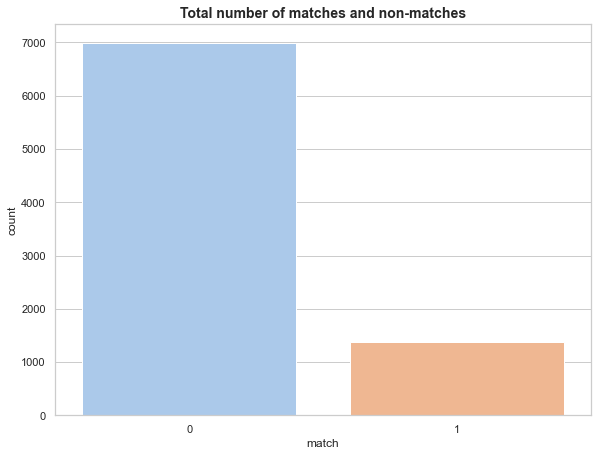

In [16]:
#Print count and proportion of matches and non-matches in the dataset
print(df.match.value_counts(normalize=True), "\n\n", df.match.value_counts())

# Create a countplot of target (match)
plt.figure(figsize=[9.6,7.2])
sns.countplot(x='match', data=df)
plt.title('Total number of matches and non-matches', fontsize=14, fontweight='bold')

Next, kernel density estimate (KDE) plots are created for all of the numeric features to explore their distributions and to see if they differ between matched and non-matched participants.  A KDE plot is essentially a "smoothed" histogram.  Additionally, boxplots are also utilized to further  investigate the distribution of the numeric features.    

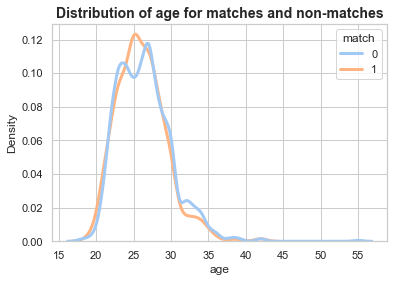

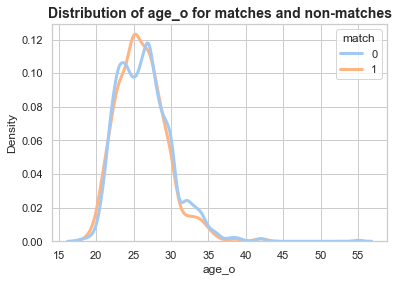

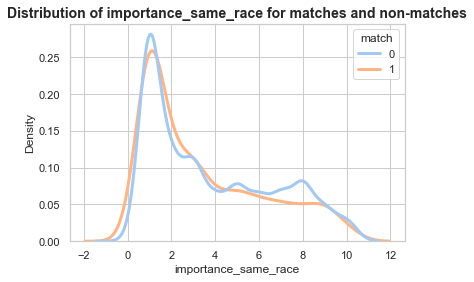

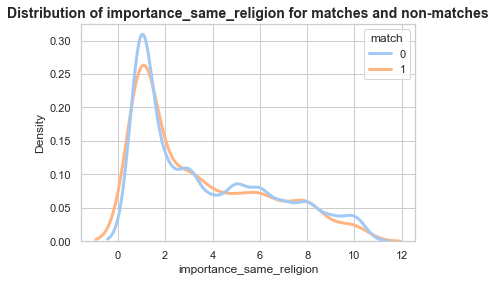

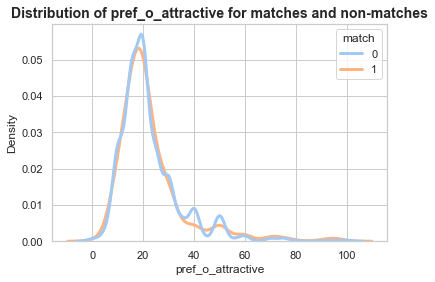

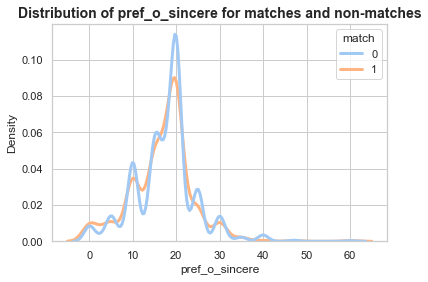

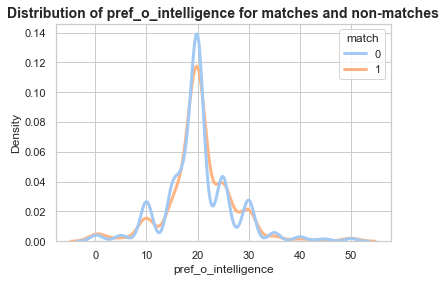

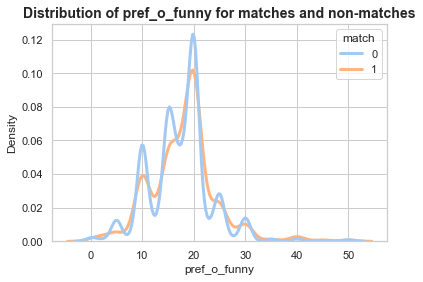

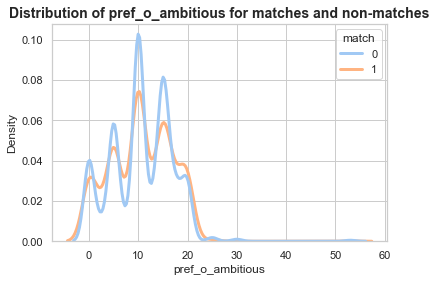

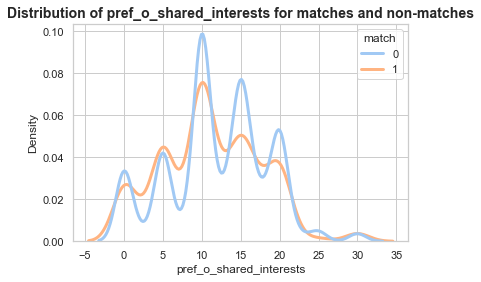

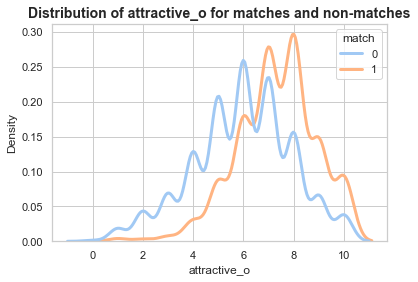

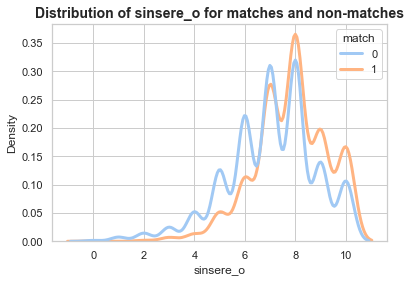

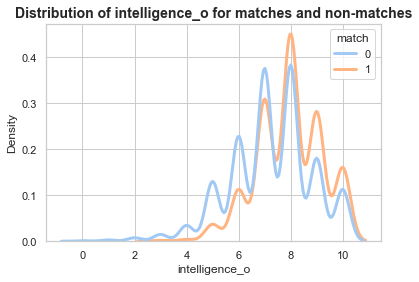

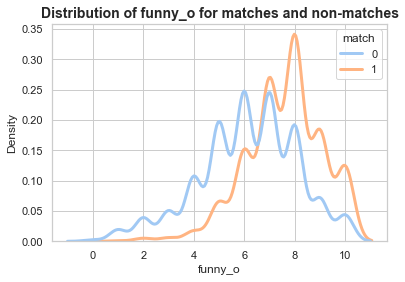

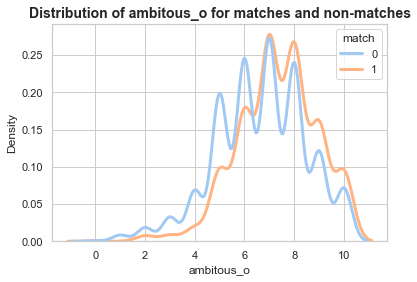

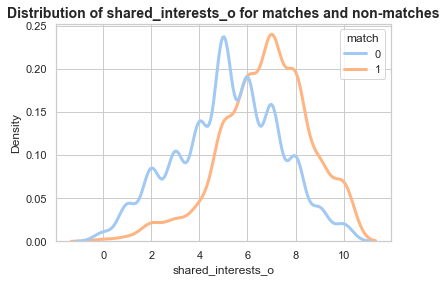

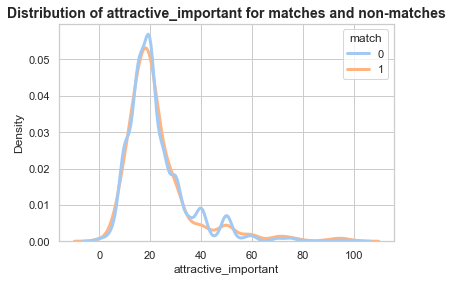

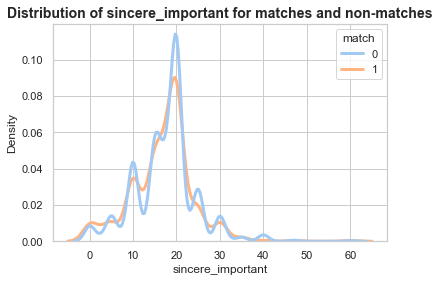

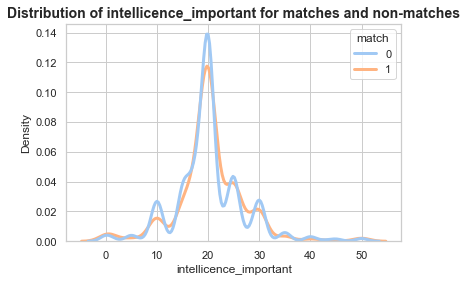

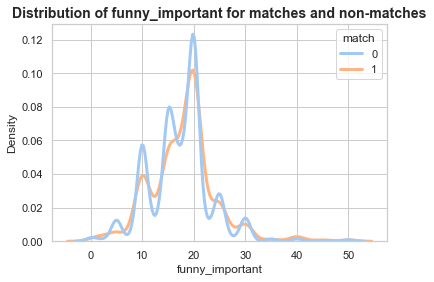

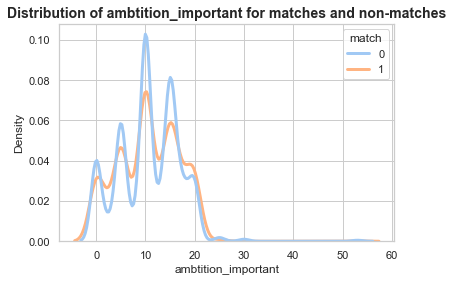

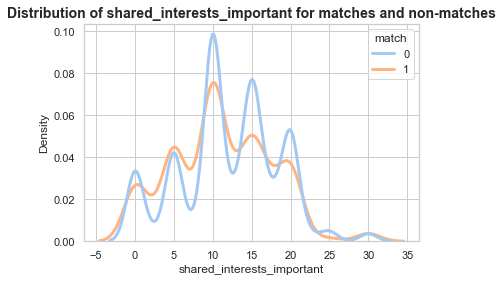

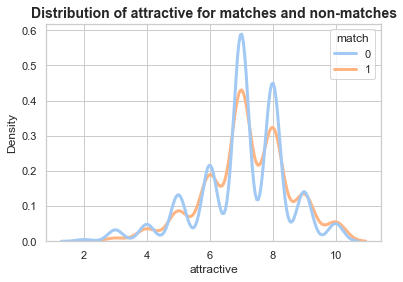

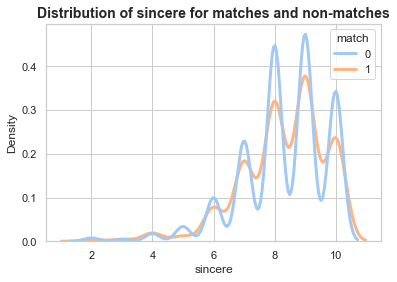

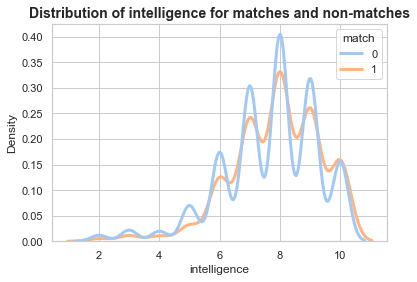

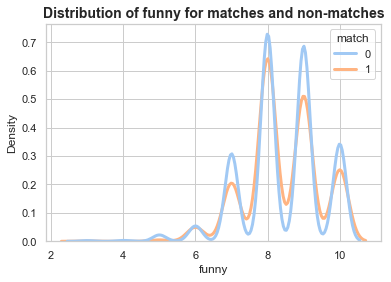

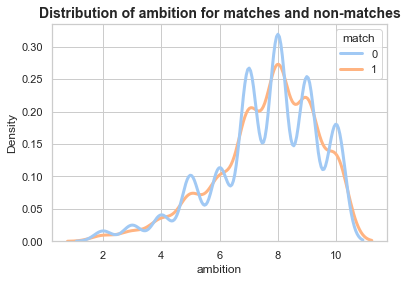

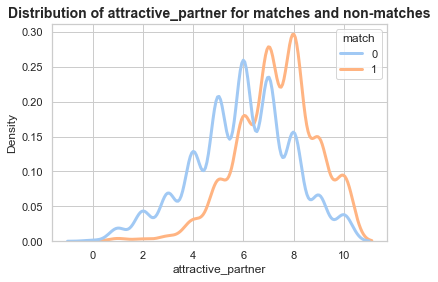

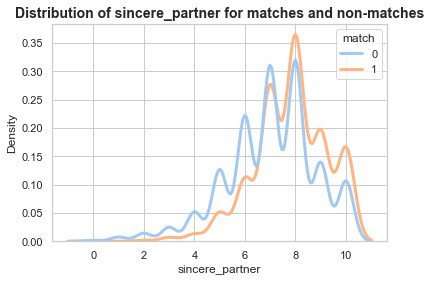

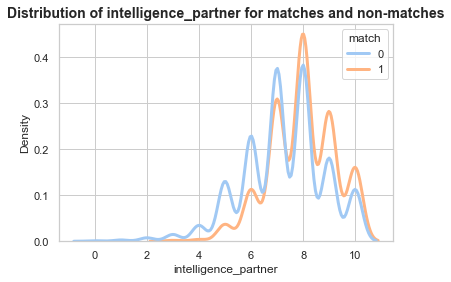

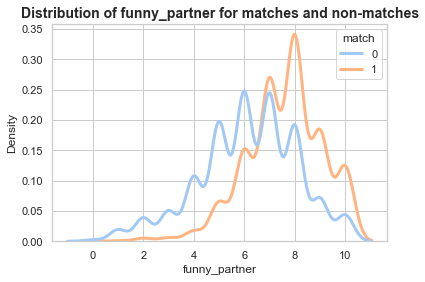

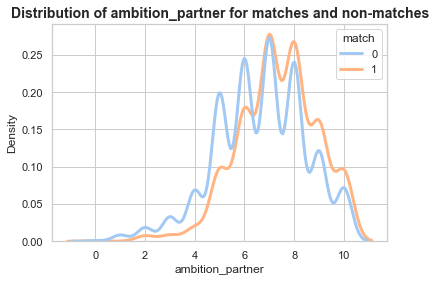

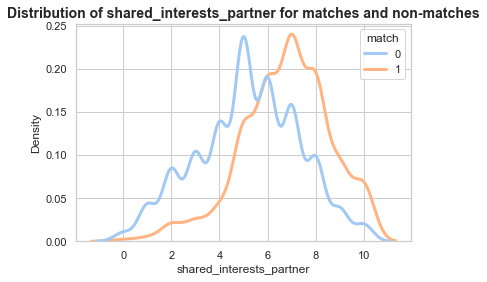

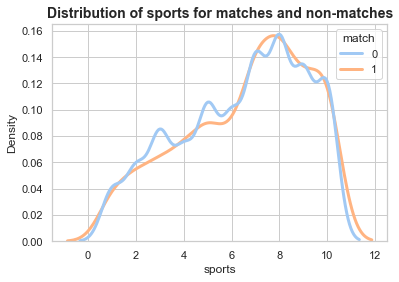

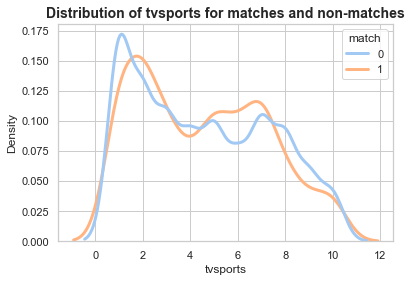

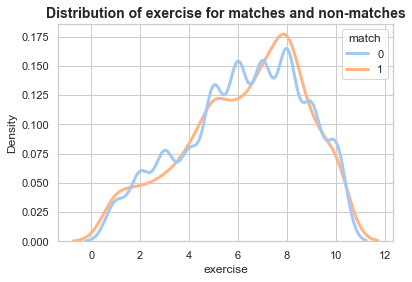

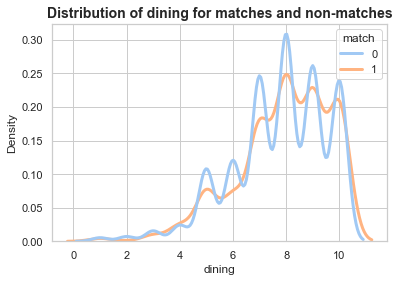

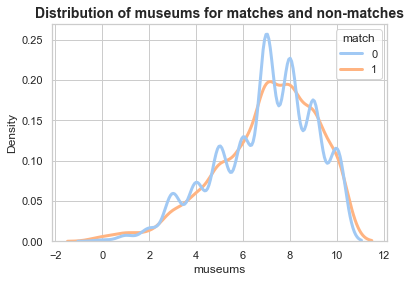

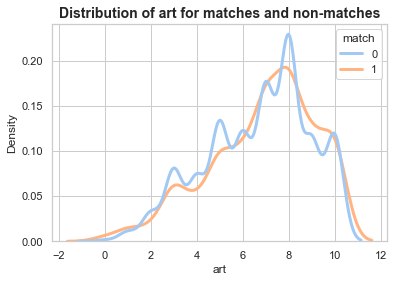

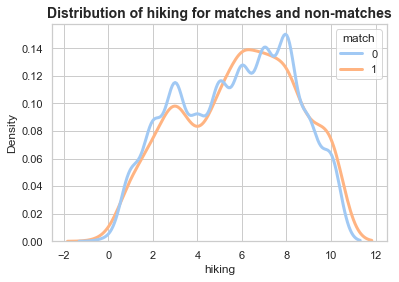

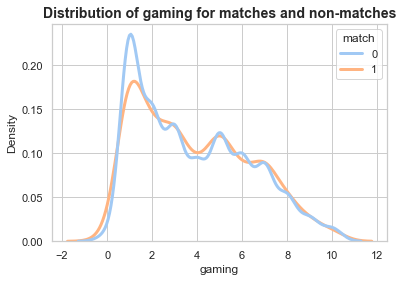

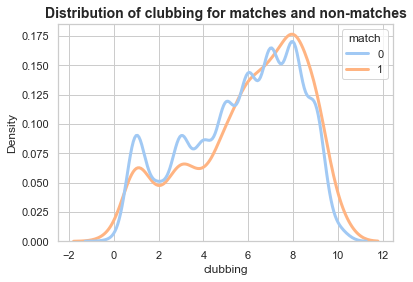

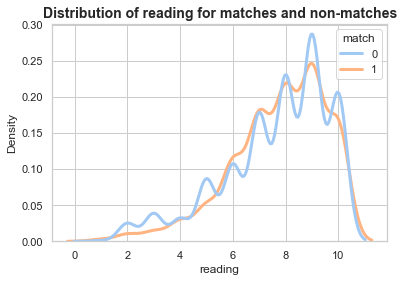

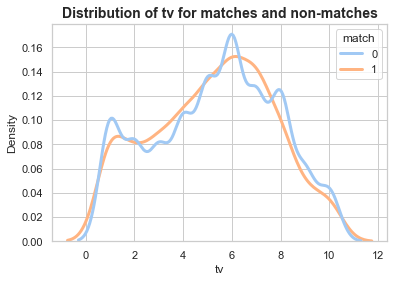

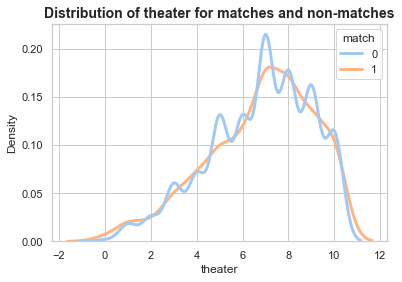

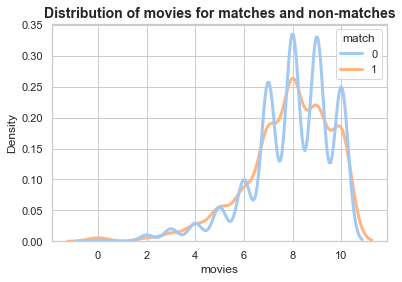

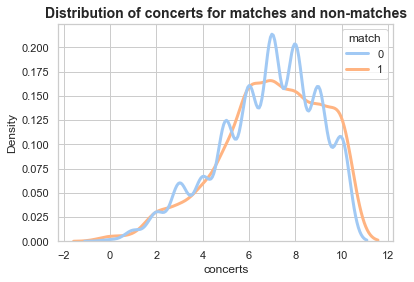

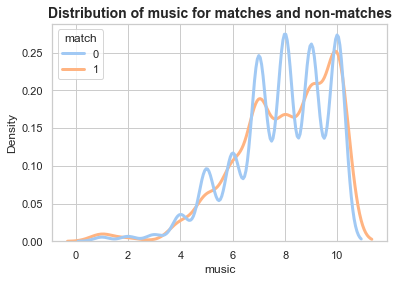

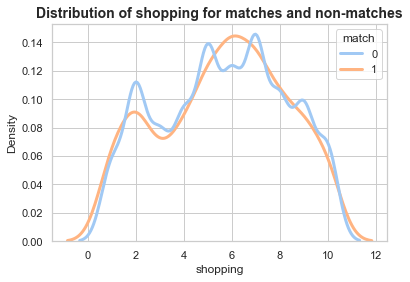

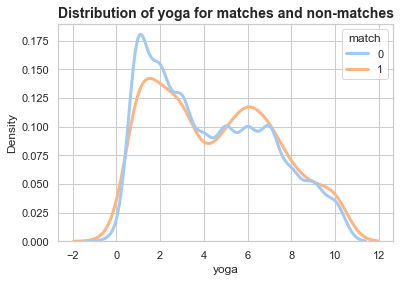

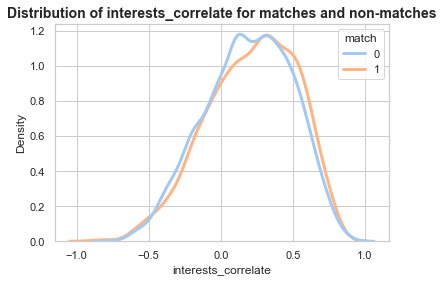

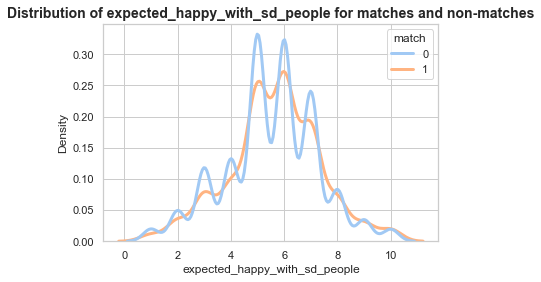

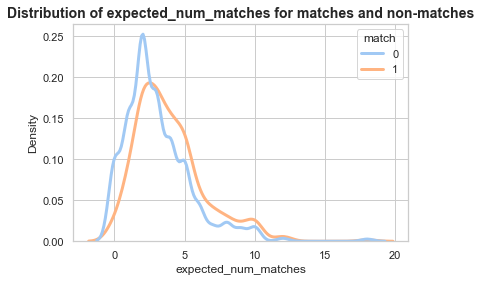

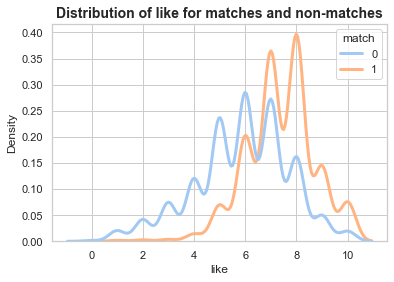

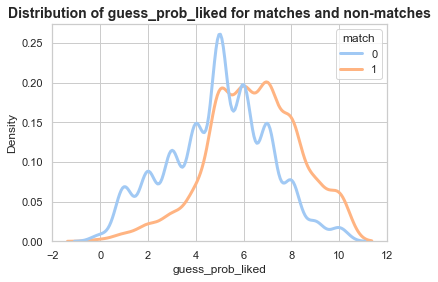

In [17]:
#list of categorical columns
categorical_columns = ['race','race_o','gender']

#only select numeric feature columns in df_viz
df_viz = df.drop(categorical_columns, axis=1)
columns= df_viz.columns 

#plot kde for each numeric feature, separating the matched and non-matched
# 'common_norm=False' --> If True, scale each conditional density by the number of observations 
#                         such that the total area under all densities sums to 1. Otherwise, 
#                         normalize each density independently.
for c in columns:
    if c not in ['samerace','met','match','has_null']: # exlude binary features and target from kde plots
        plt.figure()
        sns.kdeplot(data=df_viz, x=c, hue='match', linewidth=3, common_norm=False)
        title = 'Distribution of ' + c + ' for matches and non-matches'
        plt.title(title, fontsize=14, fontweight='bold')

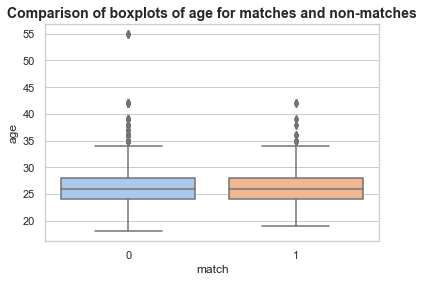

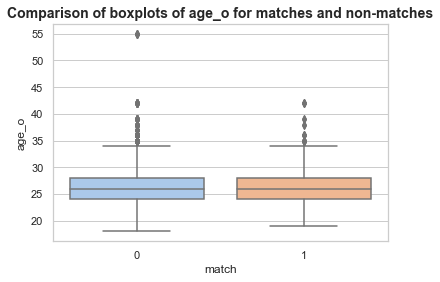

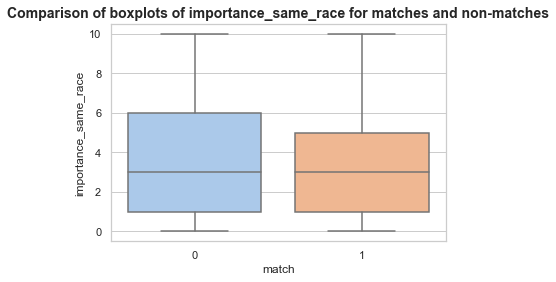

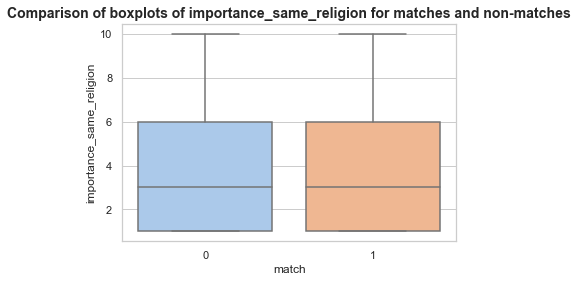

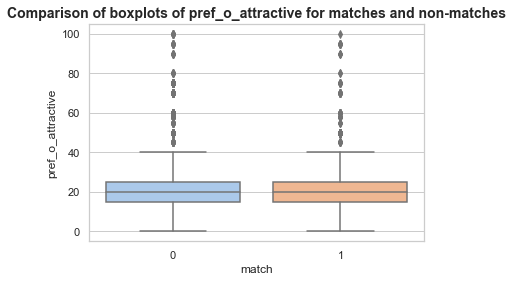

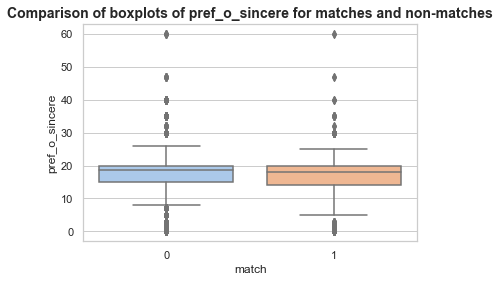

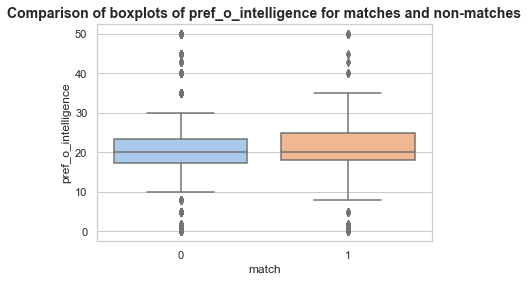

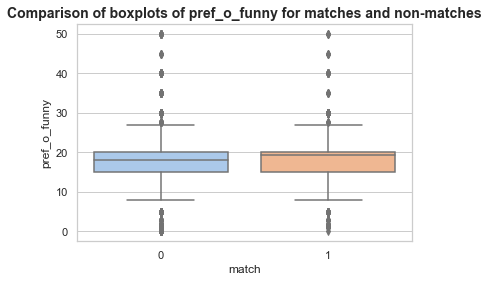

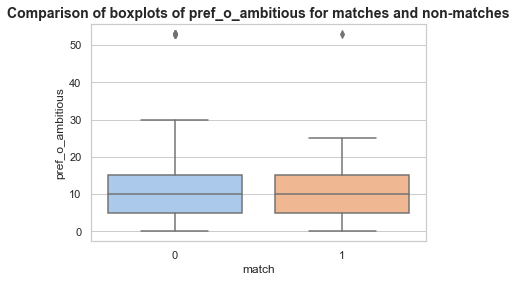

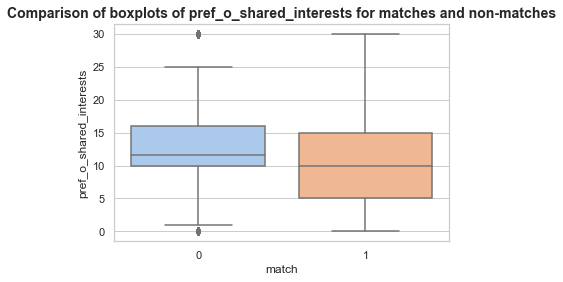

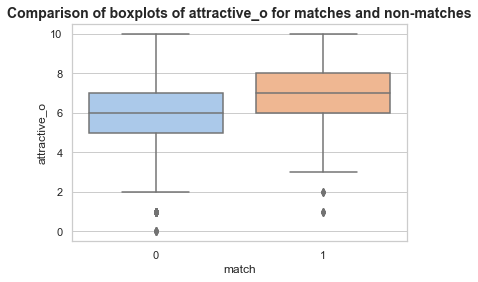

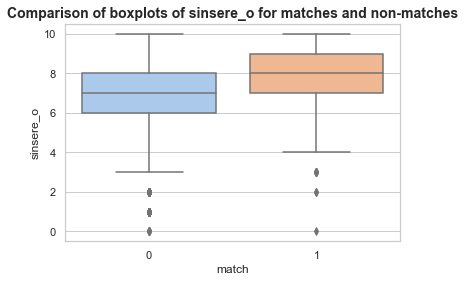

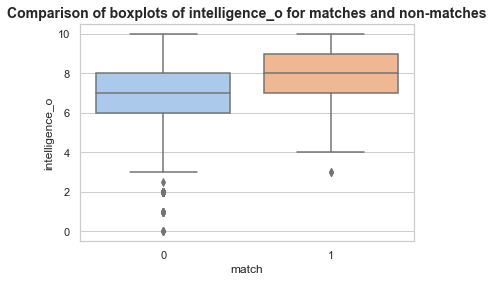

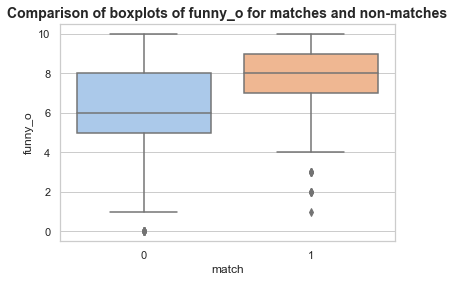

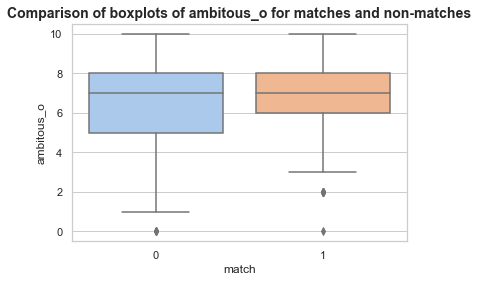

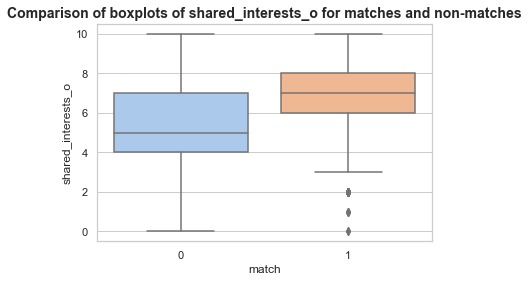

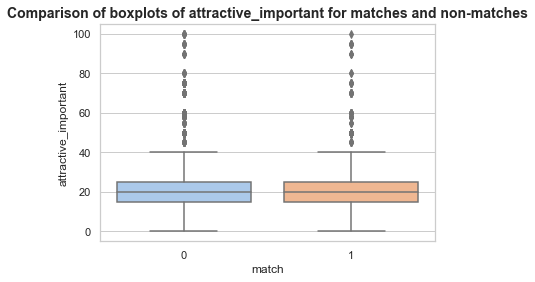

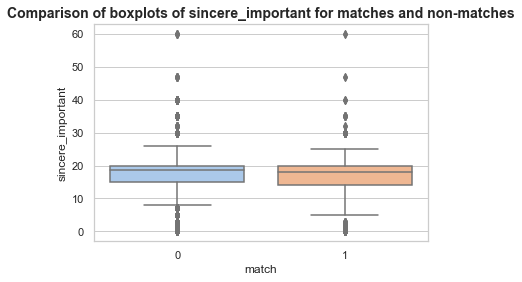

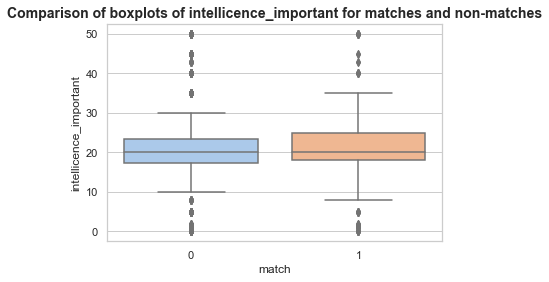

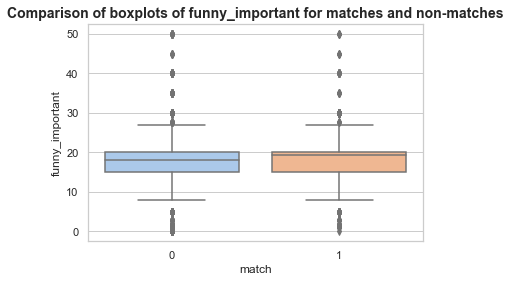

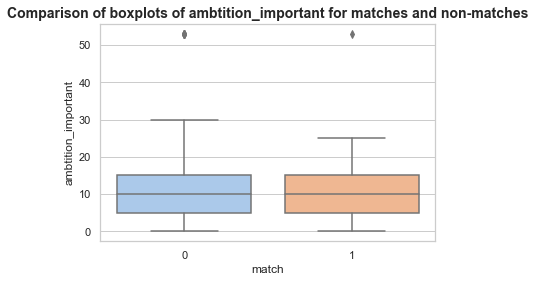

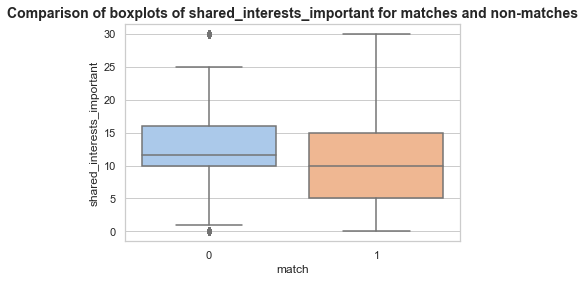

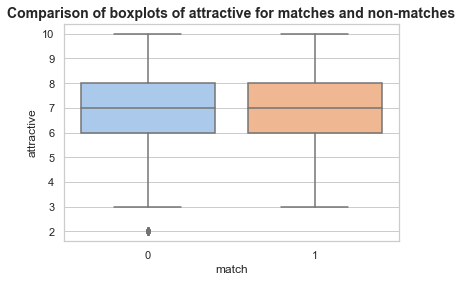

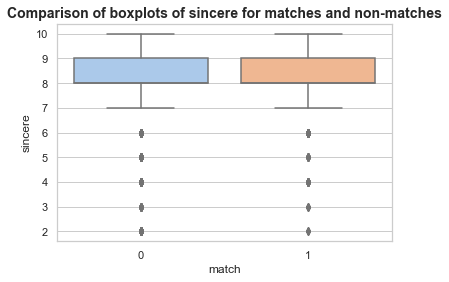

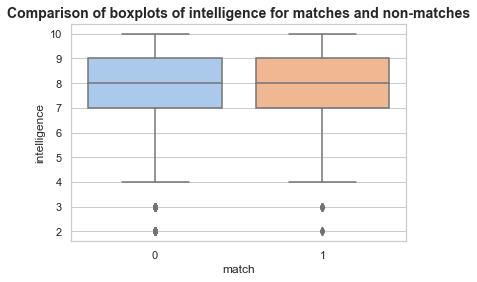

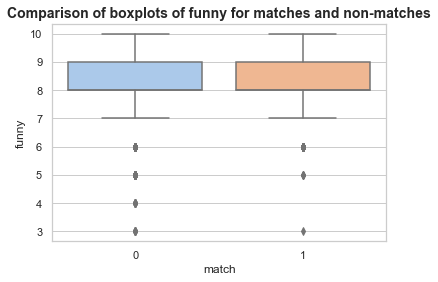

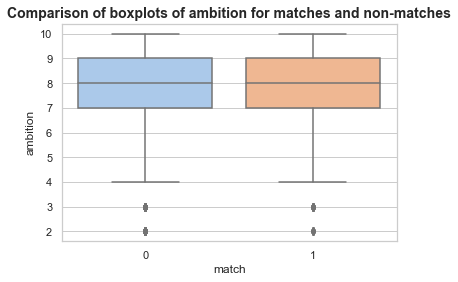

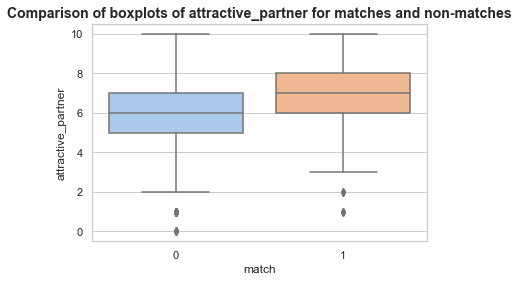

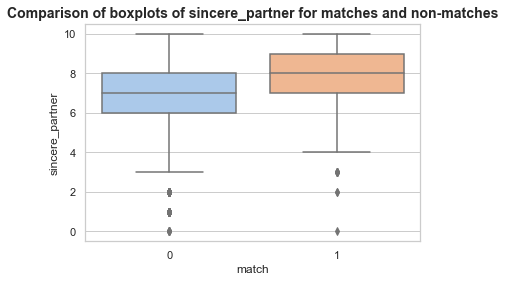

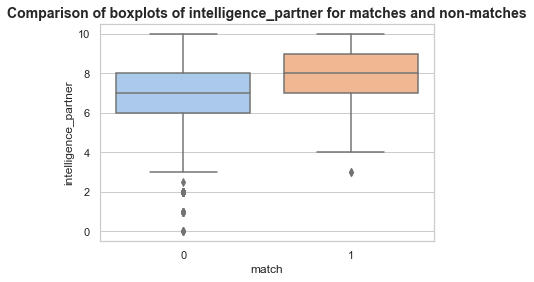

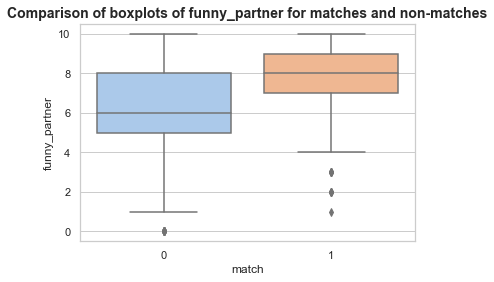

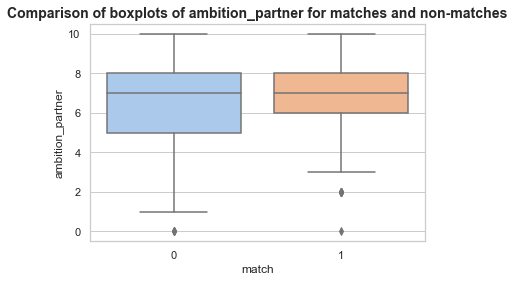

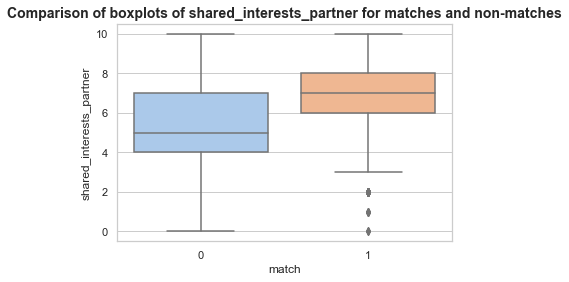

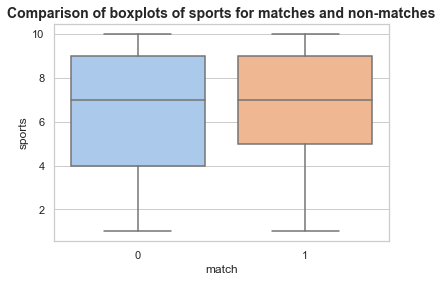

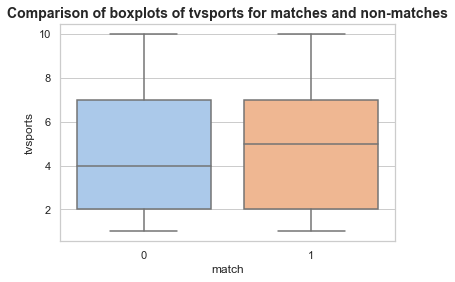

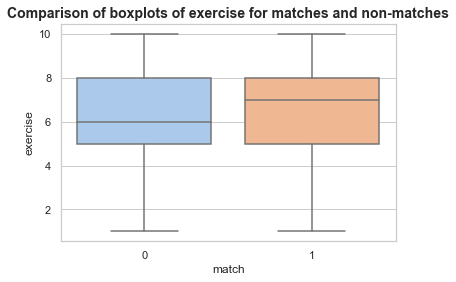

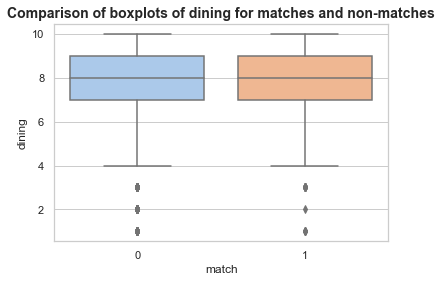

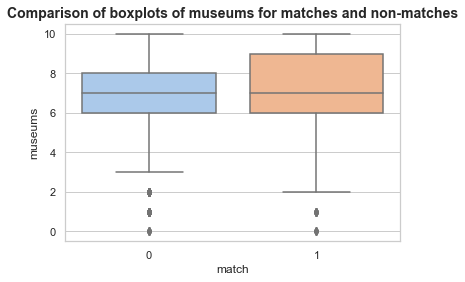

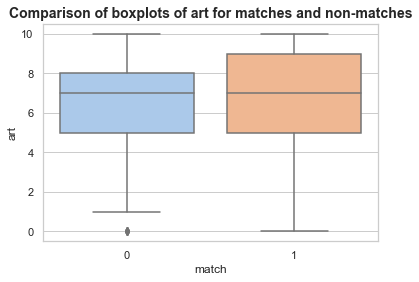

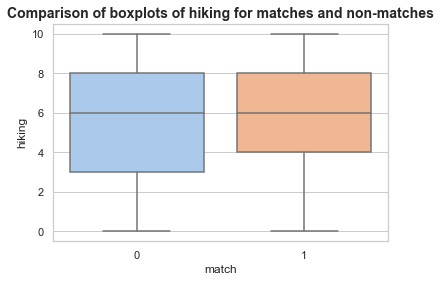

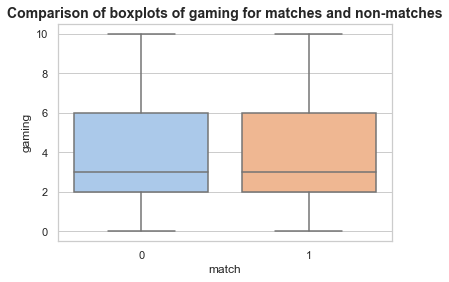

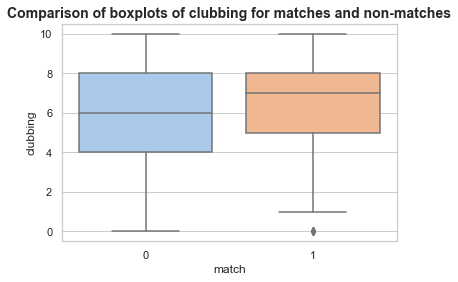

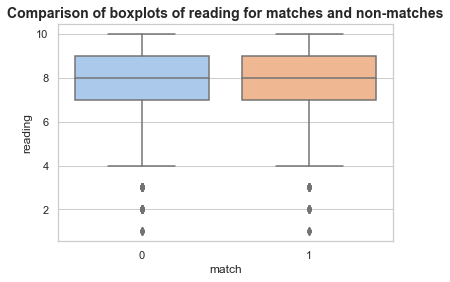

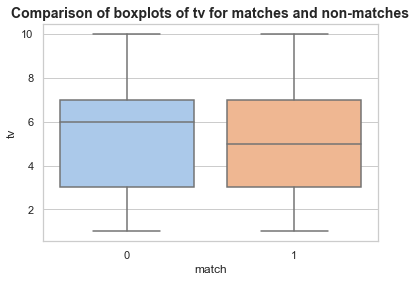

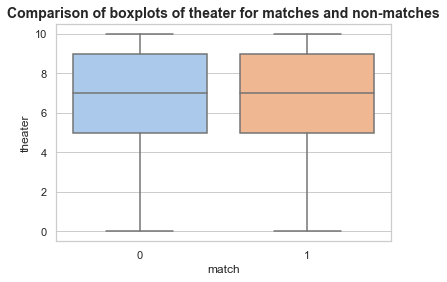

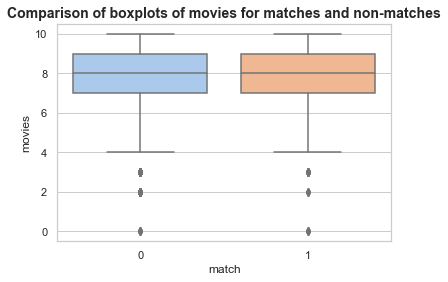

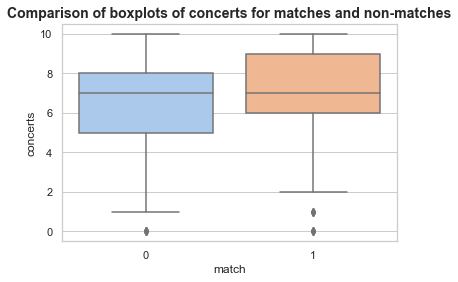

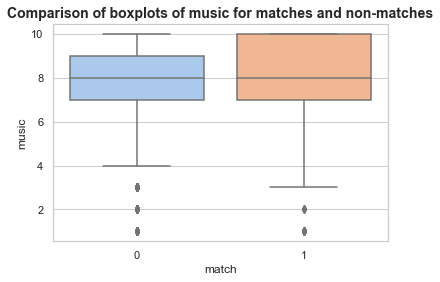

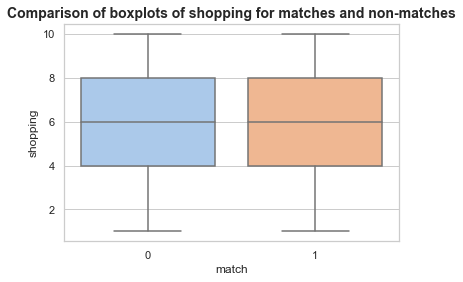

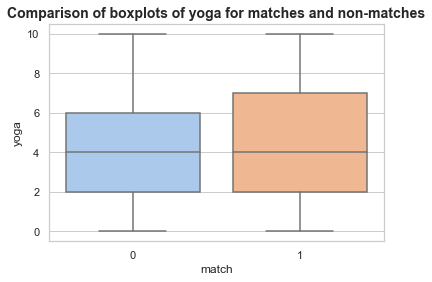

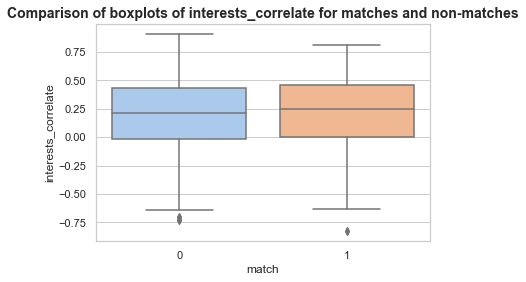

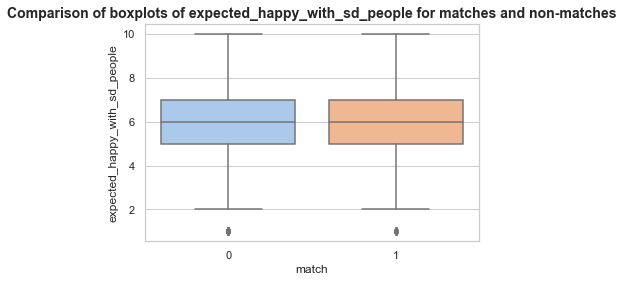

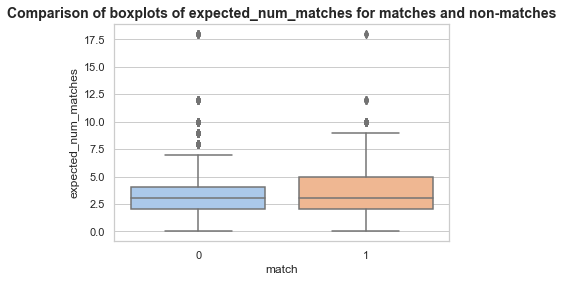

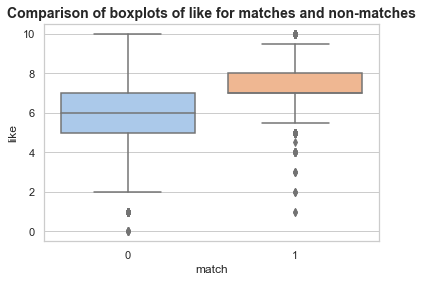

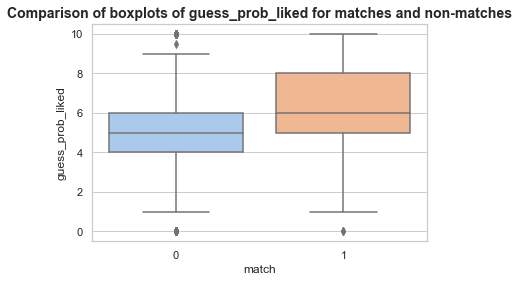

In [18]:
#Boxplots for each numeric feature, separating the matched and non-matched
for c in columns:
    if c not in ['samerace','met','match','has_null']: # exlude binary features and target
        plt.figure()
        sns.boxplot(x='match', y=c, data=df)
        title = 'Comparison of boxplots of ' + c + ' for matches and non-matches'
        plt.title(title, fontsize=14, fontweight='bold')

For the vast majority of the numeric features, the distributions are similar for matched and non-matched participants. Some noteworthy findings where the distributions and boxplots are noticeably different: <br><br>
**attractive_o** and **attractive_partner**: higher values seen in matched participants<br>
**funny_o** and **funny_partner**: higher values seen in matched participants<br>
**shared_interests_o** and **shared_interests_partner**: higher values seen in matched participants<br>
**intelligence_o** and **intelligence_partner**: higher values seen in matched participants<br>
**sinsere_o** and **sincere_partner**: higher values seen in matched participants<br>
**like**: higher values seen in matched participants<br>
**guess_prob_liked**: higher values seen in matched participants<br><br>

Intuitively, the above findings make sense, as people that find each other attractive, funny, and sincere, share similar  interests, and like each other are more likely to match.  Please refer back to the <a href='#dataset'><i>Dataset</i></a> section for the detailed description of these features.  

Next, to explore the binary features **met**, **samerace**, and **has_null** and their relationships to the target, **match**.  This is accomplished through 2x2 contingency tables.    


In [19]:
#Binary features list
bin_cols = ['met','samerace','has_null']
print("--------------------------\n")

#For each feature, print two 2x2 contingency tables: one with counts and one with proportions across columns
for b in bin_cols:
    data_crosstab = pd.crosstab(df[b], df['match'], margins = False)
    print(data_crosstab,"\n")
    data_crosstab = pd.crosstab(df[b], df['match'], margins = False, normalize='columns')
    print(data_crosstab, "\n")
    print("--------------------------\n")

--------------------------

match     0     1
met              
0.0    6445  1207
1.0     211   140 

match         0         1
met                      
0.0    0.968299  0.896065
1.0    0.031701  0.103935 

--------------------------

match        0    1
samerace           
0         4248  814
1         2750  566 

match            0         1
samerace                    
0         0.607031  0.589855
1         0.392969  0.410145 

--------------------------

match        0     1
has_null            
0          862   186
1         6136  1194 

match            0         1
has_null                    
0         0.123178  0.134783
1         0.876822  0.865217 

--------------------------



For **met**: ~10.4% couples that matched have previously met, compared to ~3.2% of the couples that didn't match have previously met <br>
For **samerace**: ~41.0% couples that matched are the same race compared to ~39.2% of the couples that didn't match are the same race <br>
For **has_null**: ~86.5% couples that matched have at least one missing value in a column compared to ~87.7% of the couples that didn't match have at least one missing value in a column <br><br>
Based on these findings, it looks like previously meeting a potential partner has a bigger effect on matching than being the same race or having a missing entry in the survey.<br>

Finally, to explore the categorical features **gender**, **race**, and **race_o**, and their relationship to the target, **match**.  This is accomplished through count plots and contingency tables.      

<Figure size 432x288 with 0 Axes>

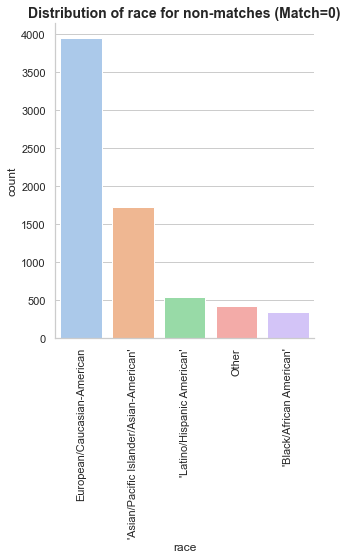

<Figure size 432x288 with 0 Axes>

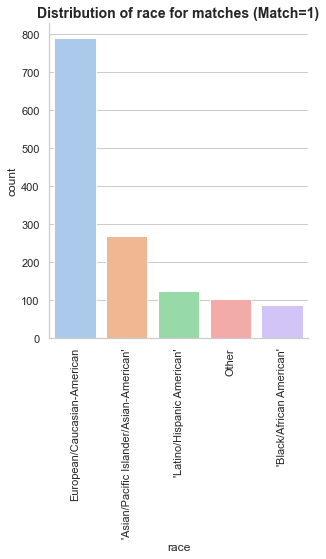

<Figure size 432x288 with 0 Axes>

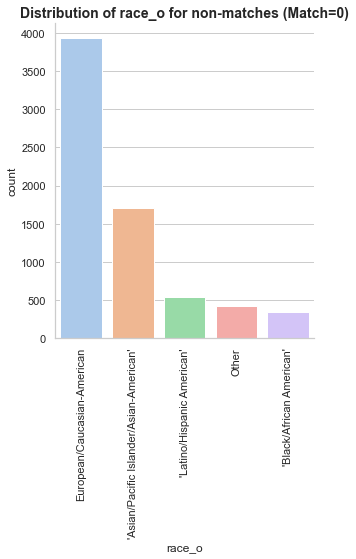

<Figure size 432x288 with 0 Axes>

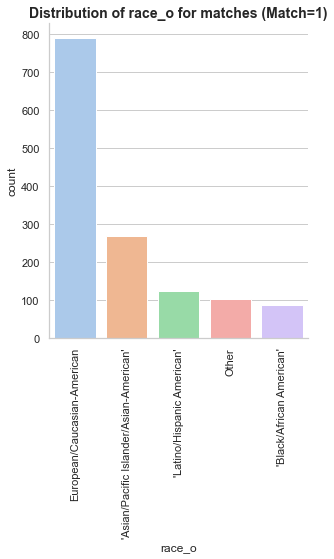

<Figure size 432x288 with 0 Axes>

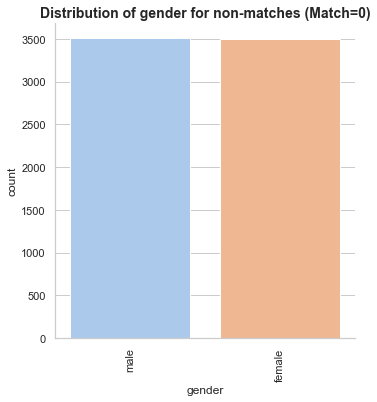

<Figure size 432x288 with 0 Axes>

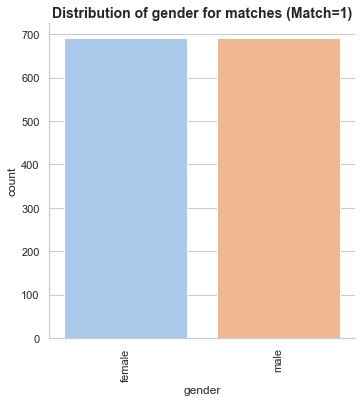

In [20]:
#countplots for categorical features (categorical_columns variable was defined earlier)
for c in categorical_columns:
    #countplots for non-matches
    plt.figure()
    sns.catplot(data=df[df.match==0], x=c, kind="count", order=df[df.match==0][c].value_counts().index)
    plt.xticks(rotation=90)
    title = "Distribution of " + c + " for non-matches (Match=0)"
    plt.title(title, fontsize=14, fontweight='bold')

    #countplots for matches
    plt.figure()
    sns.catplot(data=df[df.match==1], x=c, kind="count", order=df[df.match==1][c].value_counts().index)
    plt.xticks(rotation=90)
    title = "Distribution of " + c + " for matches (Match=1)"
    plt.title(title, fontsize=14, fontweight='bold')

In [21]:
print("--------------------------\n")

#For each categorical feature, print two contingency tables: one with counts and one with proportions across columns
for c in categorical_columns:
    data_crosstab = pd.crosstab(df[c], df['match'], margins = False)
    print(data_crosstab,"\n")
    data_crosstab = pd.crosstab(df[c], df['match'], margins = False, normalize='columns')
    print(data_crosstab, "\n")
    print("--------------------------\n")

--------------------------

match                                       0    1
race                                              
'Asian/Pacific Islander/Asian-American'  1715  267
'Black/African American'                  335   85
'Latino/Hispanic American'                541  123
European/Caucasian-American              3939  788
Other                                     419  103 

match                                           0         1
race                                                       
'Asian/Pacific Islander/Asian-American'  0.246798  0.195461
'Black/African American'                 0.048208  0.062225
'Latino/Hispanic American'               0.077853  0.090044
European/Caucasian-American              0.566844  0.576867
Other                                    0.060296  0.075403 

--------------------------

match                                       0    1
race_o                                            
'Asian/Pacific Islander/Asian-American'  1711  267
'Black/Afr

From the above countplots and contingency tables, it appears that the distribution of different levels of the categorical variables is fairly similar between matched and non-matched participants.  <br>

Based on the above visualizations and tables, it appears that these 13 features have the most significant differences in distributions between matched and non-matched participants:
<ul><b>
    <li>attractive_o</li>
    <li>attractive_partner</li>
    <li>funny_o</li>
    <li>funny_partner</li>
    <li>shared_interests_o</li>
    <li>shared_interests_partner</li>
    <li>intelligence_o</li>
    <li>intelligence_partner</li>
    <li>sinsere_o</li>
    <li>sincere_partner</li>
    <li>like</li>
    <li>guess_prob_liked</li>
    <li>met</li>  
</b></ul>

Before moving onto modeling, the dataset is reexamined to deal with missing data.  

For **met** it is assumed that if an entry is missing that a participant has not previously met the partner, so NaN's will be replaced with 0's. 

For **race** and **race_o**, NaN's will be replaced with the word ***'Unknown'***.   

For the numeric features with missing values, mean imputation is implemented.  From the table below, it is seen that the mean and median are similar for all of the numeric features.  If outliers were significantly affecting the mean, then median imputation might be more appropriate.  As an aside, though mean or median imputation can bias the data and predictive model by underestimating the variance in the data, since the percentage of missing values is mostly small (except for **shared_interests_o** and **shared_interests_partner** both missing ~13%, and **expected_num_matches** missing ~14%), the assumption is made that imputation should not have too significant of an influence on the model.  However, this is a limitation.  The assumption is also made that the missing values are not MNAR (Missing Not at Random), as mean or median imputation would not be appropriate in these cases.  It is more appropriate when data is MAR (Missing at Random) or MCAR (Missing Completely at Random).<sup><b><a href="https://medium.com/@ODSC/data-imputation-beyond-mean-median-and-mode-6c798f3212e3">4</a></b>

In [22]:
#summary statistics of numeric columns
df.describe()

,has_null,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,match
count,8378.00000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,7205.000000,8138.000000,8069.000000,8003.000000,8378.000000
mean,0.87491,26.358928,26.364999,0.395799,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190350,7.175256,7.369301,6.400474,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.843596,5.745993,7.660080,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,3.207814,6.134087,5.207523,0.043859,0.164717
std,0.33084,3.566763,3.563648,0.489051,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950178,1.740575,1.550501,1.953816,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.501024,2.502218,1.971051,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,2.444813,1.841285,2.129565,0.204793,0.370947
min,0.00000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,24.000000,24.000000,0.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,5.000000,4.000000,0.000000,0.000000
50%,1.00000,26.000000,26.000000,0.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,4.000000,6.0

In [23]:
#Replace NaN's with 0 in met and 'Unknown' in race & race_o
df['met'] = df['met'].replace(np.nan, 0)
df['race'] = df['race'].replace(np.nan, 'Unknown')
df['race_o'] = df['race_o'].replace(np.nan, 'Unknown')

#check to see there are no more missing values
print(df.met.value_counts(dropna=False),'\n')
print(df.race.value_counts(dropna=False),'\n')
print(df.race_o.value_counts(dropna=False),'\n')

0.0    8027
1.0     351
Name: met, dtype: int64 

European/Caucasian-American                4727
'Asian/Pacific Islander/Asian-American'    1982
'Latino/Hispanic American'                  664
Other                                       522
'Black/African American'                    420
Unknown                                      63
Name: race, dtype: int64 

European/Caucasian-American                4722
'Asian/Pacific Islander/Asian-American'    1978
'Latino/Hispanic American'                  664
Other                                       521
'Black/African American'                    420
Unknown                                      73
Name: race_o, dtype: int64 



Mean imputation for missing values in the numeric columns is completed below.  Technically, **samerace, has_null,** and **met** are represented as numeric values (0 or 1), but the mean imputation code does not affect these columns as at this point in the process none of these columns have missing values.  If they did, imputation would need to be taken care of separately, as was completed for **met**.  

In [24]:
#find all numeric columns and print them
numeric_mask = (df.dtypes != object)
numeric_columns = df.columns[numeric_mask].tolist()
print(numeric_columns,'\n')

['has_null', 'age', 'age_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'match'] 



In [25]:
# mean imputation implemented for missing values in numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0) 

There are no more missing values in any of the columns as shown below.  Modeling can now be implemented.   

In [26]:
#Shows no more missing values for any columns
df.isnull().sum()

has_null                         0
gender                           0
age                              0
age_o                            0
race                             0
race_o                           0
samerace                         0
importance_same_race             0
importance_same_religion         0
pref_o_attractive                0
pref_o_sincere                   0
pref_o_intelligence              0
pref_o_funny                     0
pref_o_ambitious                 0
pref_o_shared_interests          0
attractive_o                     0
sinsere_o                        0
intelligence_o                   0
funny_o                          0
ambitous_o                       0
shared_interests_o               0
attractive_important             0
sincere_important                0
intellicence_important           0
funny_important                  0
ambtition_important              0
shared_interests_important       0
attractive                       0
sincere             

## <a id='modeling'> 5. Modeling and Results </a>



This is a binary classification problem, so appropriate modeling techniques are implemented.  The following methods are compared:
<ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>Extreme Gradient Boosting</li>
</ul>

Prior to creating models, categorical features are label encoded as numeric so they can be taken in as input into the models.  For ensemble tree-based models, one hot encoding is not necessary and is sometimes even detrimental to model performance and efficiency.<sup><b><a href="https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769#:~:text=One%2Dhot%20encoding%20categorical%20variables,importance%20resulting%20in%20poorer%20performance.">5</a></b></sup>  One-hot encoding is beneficial for a logistic regression model as the label encoded categorical features should not be interpreted as having any particular order.  Therefore, one-hot encoded categorical features are used for the logistic regression model, and label encoded categorical features for the tree-based models.  

In [27]:
#Import necessary modules
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, plot_roc_curve, accuracy_score, roc_auc_score, confusion_matrix, classification_report


In [28]:
#Create categorical column mask and pre-print value counts
categorical_mask = (df.dtypes == object)
categorical_columns = df.columns[categorical_mask].tolist()
print(categorical_columns,'\n')

for c in categorical_columns:
    print(df[c].value_counts(dropna=False),'\n')

['gender', 'race', 'race_o'] 

male      4194
female    4184
Name: gender, dtype: int64 

European/Caucasian-American                4727
'Asian/Pacific Islander/Asian-American'    1982
'Latino/Hispanic American'                  664
Other                                       522
'Black/African American'                    420
Unknown                                      63
Name: race, dtype: int64 

European/Caucasian-American                4722
'Asian/Pacific Islander/Asian-American'    1978
'Latino/Hispanic American'                  664
Other                                       521
'Black/African American'                    420
Unknown                                      73
Name: race_o, dtype: int64 



In [29]:
#Label encode categorical columns
le = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

#Print value counts of categorical features with new numeric labels
for c in categorical_columns:
    print(df[c].value_counts(dropna=False),'\n')

1    4194
0    4184
Name: gender, dtype: int64 

3    4727
0    1982
2     664
4     522
1     420
5      63
Name: race, dtype: int64 

3    4722
0    1978
2     664
4     521
1     420
5      73
Name: race_o, dtype: int64 



In [30]:
#One hot encode only for logistic regression baseline model
# Save result into 'df_onehot' 
# 'drop_first=True' drops the reference category
df_onehot = pd.get_dummies(df, columns=['gender','race','race_o'], drop_first=True)

#check to see that appropriate one-hot encoded features were produced
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   age                            8378 non-null   float64
 2   age_o                          8378 non-null   float64
 3   samerace                       8378 non-null   int64  
 4   importance_same_race           8378 non-null   float64
 5   importance_same_religion       8378 non-null   float64
 6   pref_o_attractive              8378 non-null   float64
 7   pref_o_sincere                 8378 non-null   float64
 8   pref_o_intelligence            8378 non-null   float64
 9   pref_o_funny                   8378 non-null   float64
 10  pref_o_ambitious               8378 non-null   float64
 11  pref_o_shared_interests        8378 non-null   float64
 12  attractive_o                   8378 non-null   f

The dataset is split into training and validation sets (80% training, 20% validation).  The split stratifies on the target so there are the equal proportions of the target in the training and validation sets, ensuring that the data remains equally imbalanced in both sets.  Altering this imbalance could lead to the model making biased predictions for the validation set and with new data.     

In [31]:
#Separate the features and target for both the label encoded and one-hot encoded datasets
X = df.drop(columns=['match'], axis=1) #Features for label encoded dataframe
X_onehot = df_onehot.drop(columns=['match'], axis=1) #Features For one-hot encoded dataframe

y = df.match #Target

#Split the data into training and validation sets and stratify on target to make sure equal proportion of targets
#in the training and validation sets, for both the label encoded and one-hot encoded datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
X_train_onehot, X_val_onehot, y_train_onehot, y_val_onehot = train_test_split(X_onehot, y, test_size=0.20, 
                                                                              random_state=42,stratify=y)


### 5.1 Logistic Regression

A Logistic Regression classifier is created and fit to the one-hot encoded training data.  The Log Loss, AUC, and mean AUC and mean Log Loss from 5-fold cross validation are calculated for the training set.  Next, the AUC and Log Loss are calculated for the validation set.    

In [32]:
#Logistic Regression Classifer that is fit to one-hot encoded training data
lr_clf = LogisticRegression()
lr_clf.fit(X_train_onehot, y_train_onehot)

LogisticRegression()

In [33]:
######## Predicted probabilities and classes using training set ########
pred_probs = lr_clf.predict_proba(X_train_onehot)
y_pred = lr_clf.predict(X_train_onehot)

#Log Loss, AUC, and mean AUC/Log-Loss of 5-fold cross validation
lr_train_logloss = log_loss(y_train_onehot, pred_probs[:,1])
lr_train_auc = roc_auc_score(y_train_onehot, pred_probs[:,1]) 
lr_train_cv_auc = cross_val_score(lr_clf, X_train_onehot, y_train_onehot, scoring='roc_auc', cv=5)
lr_train_cv_logloss = cross_val_score(lr_clf, X_train_onehot, y_train_onehot, scoring='neg_log_loss', cv=5)

#Print metrics
print("\nTRAINING SET:")
print("Logistic Regression Log Loss: ", lr_train_logloss )
print("Logistic Regression AUC: ", lr_train_auc)
print("Logistic Regression 5-Fold CV Mean Log Loss: ", abs(lr_train_cv_logloss.mean()))
print("Logistic Regression 5-Fold CV Mean AUC: ", lr_train_cv_auc.mean())


######## Predicted probabilities and classes using validation set ########
pred_probs = lr_clf.predict_proba(X_val_onehot)
y_pred = lr_clf.predict(X_val_onehot)

#Log Loss, AUC in validation set
lr_val_logloss = log_loss(y_val_onehot, pred_probs[:,1])
lr_val_auc = roc_auc_score(y_val_onehot, pred_probs[:,1]) 

#Print metrics
print("\nVALIDATION SET:")
print("Logistic Regression Log Loss: ", lr_val_logloss )
print("Logistic Regression AUC: ", lr_val_auc)



TRAINING SET:
Logistic Regression Log Loss:  0.32058758717857166
Logistic Regression AUC:  0.8561272853658916
Logistic Regression 5-Fold CV Mean Log Loss:  0.33096687019540283
Logistic Regression 5-Fold CV Mean AUC:  0.845012865827071

VALIDATION SET:
Logistic Regression Log Loss:  0.33833194706746617
Logistic Regression AUC:  0.8404296066252588


### 5.2 Random Forest

For the Random Forest, a randomized grid search is utilized to search for the hyperparameters that create the model with the best performance, with AUC used as the scoring metric.  In this case, there are a total of 25 possible hyperparameter combinations given that **max_depth** has 5 possibilities and **n_estimators** has 5 possibilities in the code block below (5x5=25).  At random, 15 of the 25 possible models are tested, and 5-fold cross validation is performed on each of these candidate models.  For this particular case, a complete grid search of all 25 possible combinations would not be too much more costly with respect to computational time.  

A summary of the chosen hyperparameters to tune is below:<br>

<ul>
    <li> <b>n_estimators</b>: Number of trees used for prediction.</li>
    <li> <b>max_depth</b>: The maximum depth of the trees. </li>
</ul>

In [34]:
#Set up paramter grid for randomized grid search
params = {
            'max_depth': [2, 3, 4, 5, 6],
            'n_estimators': [50, 100, 250, 500, 1000]
         }

#Create Random Forest classifier 
rf_clf = RandomForestClassifier(random_state=1234, n_jobs=-1)

#Create a randomized grid search using rf_clf with 5-fold cross validation for each of the model candidates (niterations)
nfolds = 5
niterations = 15
skf = StratifiedKFold(n_splits=nfolds, shuffle = True, random_state = 1234)
random_search = RandomizedSearchCV(rf_clf, param_distributions=params, n_iter=niterations, scoring='roc_auc', n_jobs=-1,
                                   cv=skf.split(X_train,y_train), verbose=3, random_state=1234)

#Train the models
random_search.fit(X_train, y_train)

#Find the best model
best_model_rf = random_search.best_estimator_

#Print the best model and hyperparameters 
print('\n Best Model:')
print(best_model_rf)
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits

 Best Model:
RandomForestClassifier(max_depth=6, n_estimators=500, n_jobs=-1,
                       random_state=1234)

 Best hyperparameters:
{'n_estimators': 500, 'max_depth': 6}


From the search, it appears that **{'n_estimators': 500, 'max_depth': 6}** are the hyperparameters selected in the best model.  This tuned Random Forest classifier (**best_model_rf**) is extracted from the search and then fit to the training data.  The Log Loss, AUC, and mean AUC and mean Log Loss from 5-fold cross validation are calculated for the training set.  After, the AUC and Log Loss are calculated for the validation set.    

In [35]:
######## Predicted probabilities and classes using training set ########
pred_probs = best_model_rf.predict_proba(X_train)
y_pred = best_model_rf.predict(X_train)

#Log Loss, AUC, and mean AUC/Log-Loss of 5-fold cross validation
rf_train_logloss = log_loss(y_train, pred_probs[:,1])
rf_train_auc = roc_auc_score(y_train, pred_probs[:,1]) 
rf_train_cv_auc = cross_val_score(best_model_rf, X_train, y_train, scoring='roc_auc', cv=5)
rf_train_cv_logloss = cross_val_score(best_model_rf, X_train, y_train, scoring='neg_log_loss', cv=5)

#Print metrics
print("\nTRAINING SET:")
print("Random Forest Log Loss: ", rf_train_logloss )
print("Random Forest AUC: ", rf_train_auc)
print("Random Forest 5-Fold CV Mean Log Loss: ", abs(rf_train_cv_logloss.mean()))
print("Random Forest 5-Fold CV Mean AUC: ", rf_train_cv_auc.mean())


######## Predicted probabilities and classes using validation set ########
pred_probs = best_model_rf.predict_proba(X_val)
y_pred = best_model_rf.predict(X_val)

#Log Loss, AUC
rf_val_logloss = log_loss(y_val, pred_probs[:,1])
rf_val_auc = roc_auc_score(y_val, pred_probs[:,1]) 

#Print metrics
print("\nVALIDATION SET:")
print("Random Forest Log Loss: ", rf_val_logloss )
print("Random Forest AUC: ", rf_val_auc)


TRAINING SET:
Random Forest Log Loss:  0.3073408022022278
Random Forest AUC:  0.9088075257208837
Random Forest 5-Fold CV Mean Log Loss:  0.34186510331137343
Random Forest 5-Fold CV Mean AUC:  0.8484077250353075

VALIDATION SET:
Random Forest Log Loss:  0.34259733539302434
Random Forest AUC:  0.8472722567287784


### 5.3 Extreme Gradient Boosting

For the Extreme Gradient Boosting model, a randomized grid search is utilized to search for the hyperparameters that create the model with the best performance, with AUC used as the scoring metric.  In this case, there are a total of 3,840 possible hyperparameter combinations (5x4x4x4x4x3) given the grid in the code block below.  To run all possible combinations would take too long, so 30 random models are tested, and 5-fold cross validation is performed on each of these candidate models.  As previously stated, for this particular case, a complete grid search of all possible combinations would not be feasible with respect to computation time.   

A summary of the chosen hyperparameters is below:
<sup><b><a href="https://towardsdatascience.com/fine-tuning-xgboost-model-257868cf4187">6 ,</a></b></sup> 
<sup><b><a href="https://xgboost.readthedocs.io/en/latest/parameter.html">7</a></b></sup> 

<ul>
    <li><b>lambda</b>: The value used for L2 regularization term on leaf weights.  The higher the value, the model will be simpler, but runs the risk of underfitting.  If the value is too low, the model complexity increases, and there is a higher risk of overfitting.</li>
<li><b>subsample</b>: The fraction of the training data that can be utilized on a given boosting round. A low value could cause underfitting problems and high value is more prone to overfitting.</li>
<li><b>colsample_bytree</b>: The fraction of features that can be selected during a boosting round.</li>
<li><b>learning_rate</b>: The value that dictates how quickly the model fits. A low value will require more boosting rounds to achieve the same reduction in error or misclassification as a model with a high value. </li>
<li><b>n_estimators</b>: Number of boosted trees (or boosting rounds).</li>
<li><b>max_depth</b>: The maximum depth of the trees. </li>
</ul>

In [36]:
#Set up paramter grid for randomized grid search
params = {
        'lambda': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.4, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.1, 0.3],
        'n_estimators': [100, 250, 500]
        }

#Create XGBoost classifier 
xgb_clf = XGBClassifier(use_label_encoder=False, random_state=1234, verbosity=0, n_jobs=-1)

#Create a randomized grid search using xgb_clf with 5-fold cross validation for each of the model candidates (niterations)
nfolds = 5
niterations = 30
skf = StratifiedKFold(n_splits=nfolds, shuffle = True, random_state = 1234)
random_search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=niterations, scoring='roc_auc', n_jobs=-1,
                                   cv=skf.split(X_train,y_train), verbose=3, random_state=1234)

#Train the models
random_search.fit(X_train, y_train)

#Find the best model
best_model_xgb = random_search.best_estimator_

#Print the best model and hyperparameters 
print('\n Best Model:')
print(best_model_xgb)
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Best Model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='', lambda=2,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              random_state=1234, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
              subsample=0.4, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

 Best hyperparameters:
{'subsample': 0.4, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'lambda': 2, 'colsample_bytree': 1.0}


From the search, it appears that **{'subsample': 0.4, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'lambda': 2, 'colsample_bytree': 1.0}** are the hyperparameters for the best model.  This tuned XGBoost classifier (**best_model_xgb**) is extracted from the search and then fit to the training data.  The Log Loss, AUC, and mean AUC and mean Log Loss from 5-fold cross validation are calculated for the training set.  After, the AUC and Log Loss are calculated for the validation set. 

In [37]:
######## Predicted probabilities and classes using training set ########
pred_probs = best_model_xgb.predict_proba(X_train)
y_pred = best_model_xgb.predict(X_train)

#Log Loss, AUC, and mean AUC of 5-fold cross validation
xgb_train_logloss = log_loss(y_train, pred_probs[:,1])
xgb_train_auc = roc_auc_score(y_train, pred_probs[:,1]) 
xgb_train_cv_auc = cross_val_score(best_model_xgb, X_train, y_train, scoring='roc_auc', cv=5)
xgb_train_cv_logloss = cross_val_score(best_model_xgb, X_train, y_train, scoring='neg_log_loss', cv=5)

#print metrics
print("\nTRAINING SET:")
print("XGBoost Log Loss: ", xgb_train_logloss )
print("XGBoost AUC: ", xgb_train_auc)
print("XGBoost 5-Fold CV Mean Log Loss: ", abs(xgb_train_cv_logloss.mean()))
print("XGBoost 5-Fold CV Mean AUC: ", xgb_train_cv_auc.mean())

######## Predicted probabilities and classes using validation set ########
pred_probs = best_model_xgb.predict_proba(X_val)
y_pred = best_model_xgb.predict(X_val)

#Log Loss, AUC
xgb_val_logloss = log_loss(y_val, pred_probs[:,1])
xgb_val_auc = roc_auc_score(y_val, pred_probs[:,1]) 

#print metrics
print("\nVALIDATION SET:")
print("XGBoost Log Loss: ", xgb_val_logloss )
print("XGBoost AUC: ", xgb_val_auc)


TRAINING SET:
XGBoost Log Loss:  0.10245938813335467
XGBoost AUC:  0.9981803154335658
XGBoost 5-Fold CV Mean Log Loss:  0.31814519459744867
XGBoost 5-Fold CV Mean AUC:  0.8698046040657026

VALIDATION SET:
XGBoost Log Loss:  0.3044619791033946
XGBoost AUC:  0.883452380952381


The XGBoost model performed better than the Random Forest and Logistic Regression models, as it has the smallest Log Loss and highest AUC.  An AUC comparison figure and table comparing the evaluation metrics for all 3 models are below.  

In [38]:
#Create table to compare evaluation metrics from all 3 classification models
auc_loss_table = pd.DataFrame(
    {'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],  
     'AUC (Training)': [lr_train_auc, rf_train_auc, xgb_train_auc],
     'Mean AUC (5-Fold CV)': [lr_train_cv_auc.mean(), rf_train_cv_auc.mean(), xgb_train_cv_auc.mean()],
     'AUC (Validation)': [lr_val_auc, rf_val_auc, xgb_val_auc],
     'Log Loss (Training)': [lr_train_logloss, rf_train_logloss, xgb_train_logloss],
     'Mean Log Loss (5-Fold CV)': [abs(lr_train_cv_logloss.mean()), 
                                            abs(rf_train_cv_logloss.mean()), 
                                            abs(xgb_train_cv_logloss.mean())],
     'Log Loss (Validation)': [lr_val_logloss, rf_val_logloss, xgb_val_logloss]})

auc_loss_table.set_index('Model', inplace=True)
auc_loss_table

,AUC (Training),Mean AUC (5-Fold CV),AUC (Validation),Log Loss (Training),Mean Log Loss (5-Fold CV),Log Loss (Validation)
Model,,,,,,
Logistic Regression,0.856127,0.845013,0.840430,0.320588,0.330967,0.338332
Random Forest,0.908808,0.848408,0.847272,0.307341,0.341865,0.342597
XGBoost,0.998180,0.869805,0.883452,0.102459,0.318145,0.304462


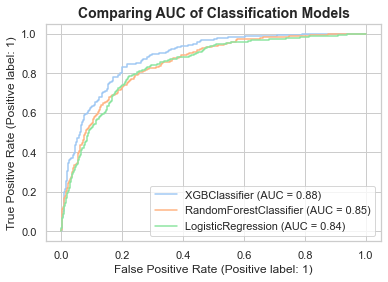

In [39]:
#Plot AUC for all 3 classification models
classifiers = [best_model_xgb, best_model_rf, lr_clf]
ax = plt.gca()
plt.title("Comparing AUC of Classification Models", fontsize=14, fontweight='bold')

for i in classifiers:
    if (i in [best_model_xgb, best_model_rf]):
        plot_roc_curve(i, X_val, y_val, ax=ax) #XGBoost and Random Forest need to use label encoded data
    else:
        plot_roc_curve(i, X_val_onehot, y_val_onehot, ax=ax) #Logistic Regression needs to use one hot encoded data

A confusion matrix of the XGBoost model is created along with an examination of the model's feature importances. Two functions to aid in these tasks are below.  The **make_confusion_matrix** function was obtained from <a href='https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py'>here</a>.   

In [40]:
#Function obtained from DTrimarchi10 on GitHub
#https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            specificity = cf[0,0] / sum(cf[0,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\n\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nSpecificity={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,specificity, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual value')
        plt.xlabel('Predicted value' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

#Fuction to generate feature importances of tree-based models
def get_feature_importance(model, feature_columns):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    f_imp = {} 
    f_imp['f_feature'] = []
    f_imp['f_value'] = []

    for f in range(X.shape[1]):
        f_imp['f_feature'].append(feature_columns[indices[f]])
        f_imp['f_value'].append(importances[indices[f]])

    imp_df = pd.DataFrame(f_imp)
    return imp_df

Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model\n')

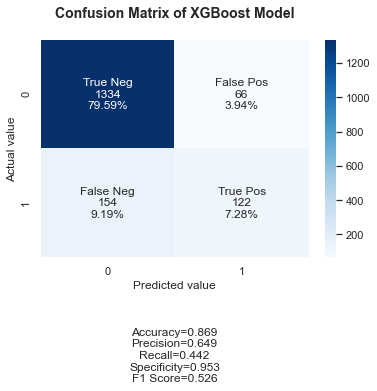

In [41]:
#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of XGBoost Model\n", fontsize=14, fontweight='bold')

Looking at the confusion matrix, the model has a much higher **specificity** (0.953) compared to **recall** (0.442).  In simpler terms, the recall is the ability of the model to correctly identify matches, and the specificity is the ability of the model to correctly identify non-matches.  Therefore, the model is much more easily able to identify non-matches in comparison to matches.  More specifically, the model predicted 44.2% of the matches correctly and 95.3% of the non-matches correctly.  The **accuracy** is 0.869, meaning for both matches and non-matches, the model predicts correctly 86.9% of the time.  As previously stated, accuracy is not the best metric for datasets with target imbalance.  The **precision** (also known as **positive predictive value**) is 0.649, meaning that if the model predicts a value of 1 (match), it is correct 64.9% of the time.  The **F1 Score** essentially measures the balance between recall and precision, and can be interpreted as a weighted average of the precision and recall.<sup><b><a href="https://en.wikipedia.org/wiki/Confusion_matrix">8 ,</a></b></sup><sup><b><a href="https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124"> 9</a></b></sup>  <br><br>


\begin{equation} Accuracy = \frac{TP+TN}{TP+FP+TN+FN} \end{equation} <br>
\begin{equation} Precision = \frac{TP}{TP+FP} \end{equation} <br>
\begin{equation} Recall = \frac{TP}{TP+FN} \end{equation} <br>
\begin{equation} Specificity = \frac{TN}{TN+FP} \end{equation} <br>
\begin{equation} F1 Score = 2*\frac{Precision*Recall}{Precision+Recall} \end{equation} <br>

Depending on the goals of the dating serving, the probability threshold for predicting a match can also be altered from the default probability threshold of 0.50. For example, with a threshold of 0.50 (confusion matrix above), there is high specificity and low recall. Suppose that the cost of a false positive is not too much, meaning that the service would rather err on the side of predicting a couple would match even if they would not. To achieve this, the probability threshold could be lowered, and this would increase the recall while sacrificing some specificity (false positives would increase and false negatives would decrease). Take for example the confusion matrix below where the probability threshold has been lowered to 0.35.

The accuracy remains similar, but the recall has increased from 0.442 to 0.583, while the specificity has reduced from 0.953 to 0.925. Of note, the F1-score increased while the precision is reduced.  Essentially, lowering the threshold resulted in a bigger gain in recall than loss in specificity, so this seems like a better probability threshold.  Varying thresholds can be tried to find the optimal threshold, depending on the goals of the dating service.   


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model (Threshold: 0.35)')

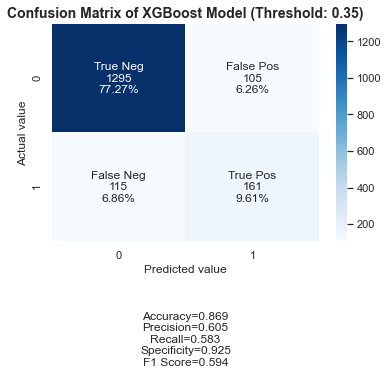

In [42]:
#probability threshold
threshold = 0.35

#make new predicitions based on this threshold
y_pred_threshold = (best_model_xgb.predict_proba(X_val)[:,1] > threshold).astype(int)

#Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_threshold)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(conf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
plt.title("Confusion Matrix of XGBoost Model (Threshold: {})".format(threshold), fontsize=14, fontweight='bold')

Going back to the visual EDA, the following features showed visibly different distributions between matched and non-matched participants: 
<ul>
    <li>attractive_o</li>
    <li>attractive_partner</li>
    <li>funny_o</li>
    <li>funny_partner</li>
    <li>shared_interests_o</li>
    <li>shared_interests_partner</li>
    <li>intelligence_o</li>
    <li>intelligence_partner</li>
    <li>sinsere_o</li>
    <li>sincere_partner</li>
    <li>like</li>
    <li>guess_prob_liked</li>
    <li>met</li>  
</ul>

As seen in the feature importance figure below, many of these features are also the most important predictive features of the XGBoost model.  

In [43]:
#Print top 10 most important features of the XGBoost model
feature_columns = list(X.loc[:, X.columns != 'match'].columns)
xgb_imp = get_feature_importance(best_model_xgb, feature_columns)
xgb_imp.sort_values('f_value',ascending=False).head(10)

,f_feature,f_value
0,like,0.051344
1,attractive_o,0.037717
2,funny_o,0.030446
3,attractive_partner,0.025399
4,guess_prob_liked,0.022945
5,funny_partner,0.022051
6,shared_interests_o,0.021309
7,expected_num_matches,0.018538
8,shared_interests_partner,0.017589
9,met,0.016746


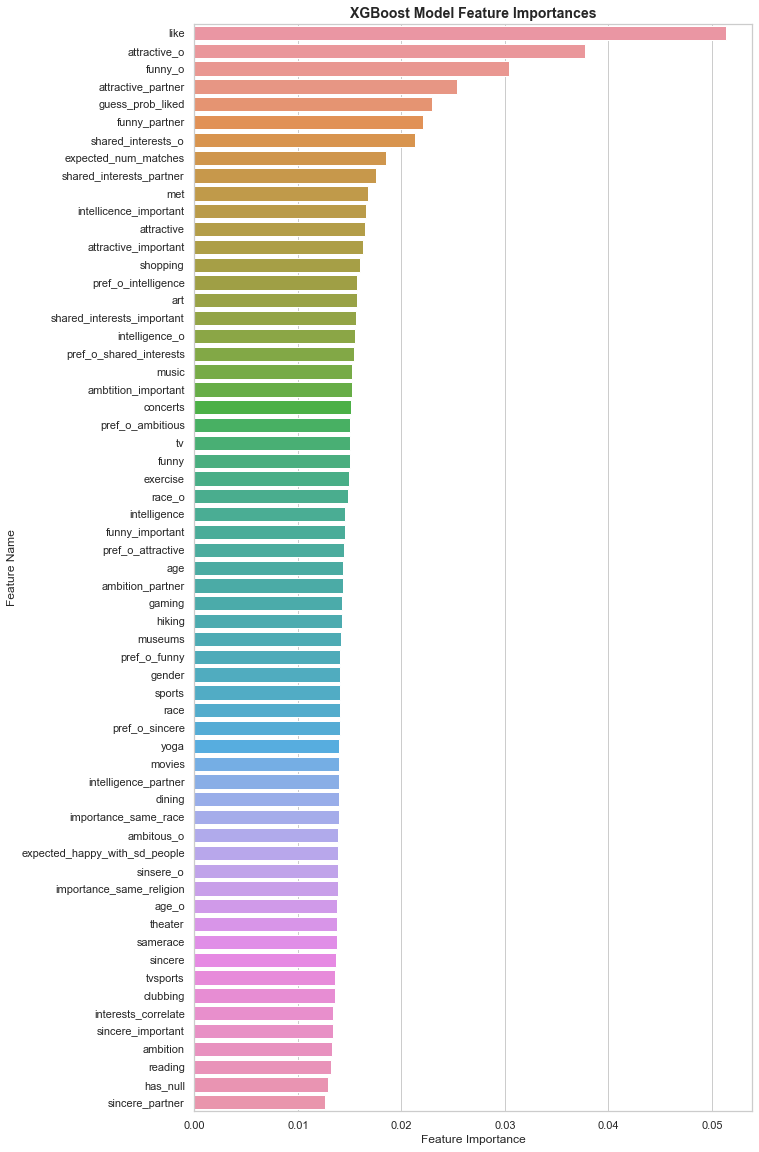

In [44]:
#Plot importances of all features sorted in descending order (most to least)
fig, ax = plt.subplots(figsize=(10,20))

sns.barplot(x=xgb_imp.f_value, y=xgb_imp.f_feature, ax =ax);
ax.set_xlabel('Feature Importance');
ax.set_ylabel('Feature Name');
ax.set_title('XGBoost Model Feature Importances', fontsize=14, fontweight='bold');

## <a id='conclusions'> 6. Conclusions and Further Directions </a>

Not surprisingly, the XGBoost model performed the best out of the three classification models with an AUC of 0.88 and Log Loss 0.30 in the validation set.  The mean AUC on the training set using 5-fold cross validation was 0.87, so the model does not seem to be overfitting.  The features that were expected to be the most important from EDA also corresponded to the most important features of the model.  As previously discussed, the model is better at detecting non-matches than matches (specificity was much higher than recall), and this is expected given the target imbalance.  Depending on what is more costly and/or beneficial from a business standpoint and customer satisfaction, the probability threshold can be adjusted accordingly for making predictions, and multiple payoff matrices can be analyzed for the best result.  For example, decreasing the threshold results in more matches being identified, but some specificity is sacrificed.  The goal would be to pick a threshold that seeks a balance between sensitivity and specificity, and results in the greatest payoff for the service from client satisfaction and financial standpoints.           

Below are some other potential suggestions for future analysis/modeling:<br>
-The model could be built with the categorical features (features prefixed by '**d_**') and then compared to the performance of the model that used numeric features.<br>
-Since XGBoost can handle missing values, the model could be built without imputing missing values and its performance could be compared.  The missingness of the data could also be further explored and more complex imputation methods could be implemented depending on the results.<br>
-The number of features in the model could be reduced from 61 to only the most important features.  If this lower dimensional model performed equally well to the current model, it could be used in the future to reduce computational time.  Additionally, the dating service could then start collecting data on only these most impactful features, which could reduce the time spent and cost of collecting data.  Also, this measure could potentially reduce model overfitting as well as data quality issues, as shorter surveys could lead to less data entry errors and missing values.<br>
-Creation of another model purely based on data from pre-date preferences, and not data obtained post-date. Depending on how well this model performed, it could be used to arrange people into groups that would have higher match success rates. 

## <a id='references'> 7. References </a>

<ol>
    <li> <a href="https://en.wikipedia.org/wiki/Speed_dating"> Speed Dating </a> </li>
    <li> <a href="https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/"> Tour of Evaluation Metrics for Imbalanced Classification</a></li>
    <li> <a href="https://machinelearningmastery.com/binary-flags-for-missing-values-for-machine-learning/">Add Binary Flags for Missing Values for Machine Learning</a></li>
    <li> <a href="https://medium.com/@ODSC/data-imputation-beyond-mean-median-and-mode-6c798f3212e3">Data Imputation: Beyond Mean, Median, and Mode</a></li>
    <li> <a href="https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769#:~:text=One%2Dhot%20encoding%20categorical%20variables,importance%20resulting%20in%20poorer%20performance.">One-Hot Encoding is making your Tree-Based Ensembles worse, here’s why?</a></li>
    <li> <a href="https://towardsdatascience.com/fine-tuning-xgboost-model-257868cf4187"> Fine Tuning XGBoost model</a></li>
    <li> <a href="https://xgboost.readthedocs.io/en/latest/parameter.html"> XGBoost Parameters </a></li>
    <li> <a href="https://en.wikipedia.org/wiki/Confusion_matrix"> Confusion Matrix </a></li>
    <li> <a href="https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124"> Accuracy, Recall, Precision, F-Score & Specificity, which to optimize on? </a></li>
</ol>


<center>
    <a href='#top'> <b><h2> GO BACK TO TOP</h2></b></a>
</center>